___
# **Ecommerce Customer Churn Analysis and Prediction**

This project aims to create a model that's able to predict the likeliness of a customer to churn. We'll be using an ecommerce churn dataset obtained from Kaggle and preprocess it to make it suitable for model training. We then will train and evaluate multiple models using different algorithms and choose the best performing model. We'll then tune this model through hyperparameter tuning to try and improve it. The final model deployed so it can be used.

Deployment link: [here](https://ecommerce-churn-prediction-rafiabhinaya.streamlit.app/).
___

# **Import Libraries**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import cloudpickle

___
# **Business Understanding**

## **Background**

In running a business, customers are one of the most important stakeholders [(Poulos, 2023)](https://www.linkedin.com/pulse/who-stakeholders-business-why-do-matter-dave-poulos/). Customers are the one who uses the product and businesse's main source of income often comes from them. In an E-commerce business, customers are the one who purchase products from merchants through the company's platform. While attracting new customers will increase the platform's user count, what's important is also retaining existing customers. E-commerce provides a marketplace platform transaction between customers and merchants, where we want customers to keep making purchases through the platform. 

Now what happens when customers doesn't return to use the the product? The company will lose a source of income because this customer won't be making anymore purchases through the platform. When multiple occurance of this happens, the company will lose a huge amount revenue because the user of the product will decrease [(Kheirallah, 2024)](https://a-a-k.medium.com/what-is-churn-why-is-it-bad-and-why-it-needs-to-be-fixed-e40c217c363f). This phenomenon is called a Churning. Churning refers to the number of customers who stopped using a particular product [(Prabadevi et al., 2023)](https://www.sciencedirect.com/science/article/pii/S2666603023000143).

Churning is a common thing that happens in businesses, what the company can do is minimize the churn rate of their customers. One way of doing this is by detecting which customers has the potential for churning. By detecting the customers that have the potential to churn, the company can give them special treatments to convince them to keep using their products in hopes of retaining these customers. Hence, it is very beneficial if a company can make a program that predicts whether a customer will churn or not [(Prabadevi et al., 2023)](https://www.sciencedirect.com/science/article/pii/S2666603023000143).

Therefore, in this notebook, we will try to build a model that can predit the likeliness of a customer to churn.

___
# **Dataset**
The dataset used in this project is the **Ecommerce Customer Churn Analysis and Prediction** obtained from Kaggle. This dataset contains various Ecommerce user's information, such as gender, order count, etc. Each customer also has a label indicating whether they churned or not. The dataset consists of 5630 rows and 20 columns. Information of each column can be seen below:
| Column Name                   | Description                                                         |
|------------------------------|---------------------------------------------------------------------|
| `CustomerID`                 | Unique customer ID                                                 |
| `Churn`                      | Churn Flag                                                         |
| `Tenure`                     | Tenure of customer in organization                                 |
| `PreferredLoginDevice`       | Preferred login device of customer                                 |
| `CityTier`                   | City tier                                                          |
| `WarehouseToHome`            | Distance between warehouse and customer's home                     |
| `PreferredPaymentMode`       | Preferred payment method of customer                               |
| `Gender`                     | Gender of customer                                                 |
| `HourSpendOnApp`             | Number of hours spent on mobile application or website             |
| `NumberOfDeviceRegistered`   | Total number of devices registered to a particular customer        |
| `PreferedOrderCat`           | Preferred order category of customer in last month                 |
| `SatisfactionScore`          | Satisfaction score of customer on service                          |
| `MaritalStatus`              | Marital status of customer                                         |
| `NumberOfAddress`            | Total number of addresses added by the customer                    |
| `Complain`                   | Whether any complaint has been raised in the last month            |
| `OrderAmountHikeFromlastYear`| Percentage increase in order amount from last year                 |
| `CouponUsed`                 | Total number of coupons used in the last month                     |
| `OrderCount`                 | Total number of orders placed in the last month                    |
| `DaySinceLastOrder`          | Days since last order by the customer                              |
| `CashbackAmount`             | Average cashback received in the last month                        |

The link to the dataset can be accessed [here](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data).

___
# **Data Loading**
Let's load the data from the excel file.

In [2]:
# load data
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [3]:
# show head
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# show tail
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [5]:
# describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [6]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

We've successfully loaded the data and viewed the head and tail. The column data type seems to already be proper and some columns seems to have already been encoded. 
- Numerical continuous columns: `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CashbackAmount`.
- Numerical dicrete columns: `Tenure`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`.
- Cateogorical ordinal columns: `CityTier`, `SatisfactionScore`.
- Categorical nominal columns: `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, `MaritalStatus`.
- Binary columns: `Churn`, `Complain`.

If we look closely, there seems to be some typos and format inconsistensies in our column name. Let's fix them.

In [7]:
# rename columns
df.rename(columns={'PreferedOrderCat':'PreferredOrderCat',
                   'OrderAmountHikeFromlastYear':'OrderAmountHikeFromLastYear'}, inplace=True)

There also seems to be some missing values. Let's check the amount and percentage of missing values.

In [8]:
# check missing values
df_mis = pd.DataFrame({'mis_val':df.isna().sum(),
                        'percentage':round(df.isna().sum()/len(df)*100,2)})

# show missing value from all rows
mis_row = len(df[df.isna().any(axis=1) == True])
print(f'Rows with mis val: {mis_row}({round(mis_row/len(df)*100,2)}%)')

# show missing value in each column
df_mis[df_mis['mis_val'] > 0]

Rows with mis val: 1856(32.97%)


,mis_val,percentage
Tenure,264,4.69
WarehouseToHome,251,4.46
HourSpendOnApp,255,4.53
OrderAmountHikeFromLastYear,265,4.71
CouponUsed,256,4.55
OrderCount,258,4.58
DaySinceLastOrder,307,5.45


From the table above, there are seven columns with missing values. All of the percentages seems to be around 5%, while the cumulative rows with missing value reaches 32%. This shows that there are either no or very few rows that have multiple missing values in their rows. We will handle these missing values later on feature engineering.

Let's also check for duplicates.

In [9]:
# check duplicate
df.duplicated().sum()

0

From the result above, we can conclude that our dataset is safe from duplicated rows.

___
# **Exploratory Data Analysis**
It's a good practice to better understand our data first before we try to create a model. We might get insights that can help us make better decisions. Let's now explore our dataset to dig up insights.

Before we explore our data, we'll temporarily fill out the missing values in our dataset to avoid errors. let's check the normality of our columns with missing values to determine how to temporarily fill them out.

In [10]:
# column with missing values
mis_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromLastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# check skewness
df[mis_cols].skew()

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
OrderAmountHikeFromLastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
dtype: float64

From the output above, we can see that most of our data is skewed proven by a skewness value above 0.5. Only `HourSpendOnApp` is not skewed. We'll now temporarily impute missing values with median for skewed columns, and mean for not skewed columns.

In [11]:
# create copy
df_eda = df.copy()

# impute missing values with median
for col in ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromLastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']:
    df_eda.loc[df_eda[col].isna(), col] = df_eda[col].median()

# impute missing values with mean
df_eda.loc[df_eda['HourSpendOnApp'].isna(), 'HourSpendOnApp'] = df_eda['HourSpendOnApp'].mean()

# check missing values
mis_row_eda = df_eda.isna().sum(axis=1).sum()
print(f'Rows with mis val: {mis_row_eda}')

Rows with mis val: 0


## **How is the proportion of churned and not churned customers?**
This is a simple question to answer. We just need to count how many customers are churned and not.

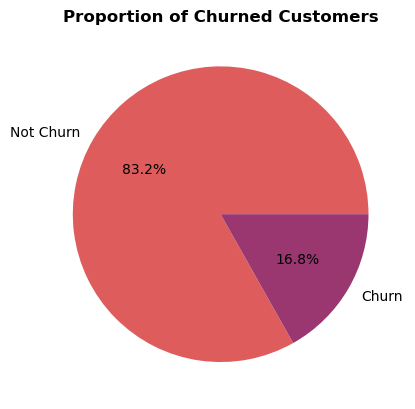

In [12]:
# count each label
df1 = df_eda['Churn'].value_counts()

# show pie chart
plt.pie(x=df1,
        labels=['Not Churn','Churn'], 
        colors=sns.color_palette('flare', n_colors=2),
        autopct='%1.1f%%')
plt.title('Proportion of Churned Customers', fontweight='bold')
plt.show()

From the chart above, we can see that most of the customers are not churned, holding only 16.8% from the all of the customers. The data we have currently are user data from the last one month, meaning 16.8% is our monthly churn rate. Having this amount of churn rate is actually bad, because according to [Kumar (2024)](https://www.chargebee.com/blog/ecommerce-churn-rate/), the good monthly churn rate is around 5%. This means our 16.8% churn rate is actually high and not ideal. We aim to decrese this rate by creating this machine learning model later.

## **Are there any features that affect the likeliness of customer churn?**
Knowing what feature directly correlates to the churn label can help give us an idea on what affects a customer's decision to churn. The target column is binary, therefore we'll use the proper correlation coefficients according to the data types.
- For numerical features, we'll use point biserial correlation to calculate the correlation.
- For binary and categorical features, we'll use cramer's v to calculate the correlation.

*We won't be checking correlations with `CustomerID`, as it is just a unique identifier.

In [13]:
# function for cramer's v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

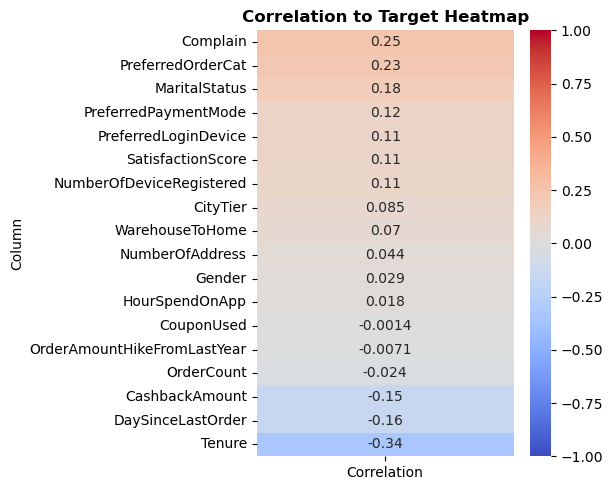

In [14]:
# numerical and categorical columns
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
            'OrderAmountHikeFromLastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cat_cols = df_eda.select_dtypes(include='object').columns.to_list() + ['CityTier', 'SatisfactionScore', 'Complain']

# correlation values list
corr_num = []
corr_cat = []

# calculate correlation of numerical columns
for col in num_cols:
    corr,_ = stats.pointbiserialr(df_eda[col], df_eda['Churn'])
    corr_num.append(corr)

    # calculate correlation of categorical columns
for col in cat_cols:
    corr = cramers_v(df_eda[col], df_eda['Churn'])
    corr_cat.append(corr)

# convert to dataframe
df2 = pd.DataFrame({'Column':num_cols+cat_cols, 'Correlation':corr_num+corr_cat}).set_index('Column').sort_values('Correlation',ascending=False)

# show heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df2[['Correlation']], annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation to Target Heatmap', fontweight='bold')
plt.tight_layout()
plt.show()

From the chart above, we can see that all of our feature doesn't have a strong correlation to the target. Having a correlation value  of +-0.5 to +-1 is considered as strong correlation, and none of our features have a correlation value of this range. The strongest correlation is with `Tenure` with -0.34, this is considered as moderate correlation with a negative direction. The rest of the features have weak correlation, proven by their values being close to 0.

From this, we can conclude that there are no individual feature that directly and strongly affects the decision of a customer to churn or not.

## **Is there a pattern of tenure between churned and not churned customers?**
Since `Tenure` is the strongest correlated feature to `Churn`, let's see if there's if we can find a pattern of churned an not churned customers through this feature. `Tenure` in this dataset is a bit ambiguos. It's supposed to tell how long the customer have been a user of the product, but we don't know the time interval that it explains. Since the tenure ranges until 60, I thought that the interval is by months. But, when customers have a `Tenure` of 0, they still have a value in `OrderAmountHikeFromlastYear`, which doesn't make sense since the customer have just joined. For ease of analysis, I'll assume that `Tenure` is how many months the customer have been using the platform.

I will now categorize customers based on how long they have been a customer based on `Tenure`
- if `Tenure` ranges from 0-6 months ---> Newcomer
- if `Tenure` ranges from 7-12 months ---> Recent Adopter
- if `Tenure` ranges from 13-24 months ---> Regular Customer
- if `Tenure` is above 24 months ---> Veteran Customer

In [15]:
# create new column
df_eda['TenureCategory'] = ''

# categorize customer
df_eda.loc[df_eda['Tenure'] <= 6, 'TenureCategory'] = 'Newcomer' 
df_eda.loc[(df_eda['Tenure'] >= 7) & (df_eda['Tenure'] <= 12), 'TenureCategory'] = 'Recent Adopter' 
df_eda.loc[(df_eda['Tenure'] >= 13) & (df_eda['Tenure'] <= 24), 'TenureCategory'] = 'Regular Customer'
df_eda.loc[df_eda['Tenure'] > 24, 'TenureCategory'] = 'Veteran Customer' 

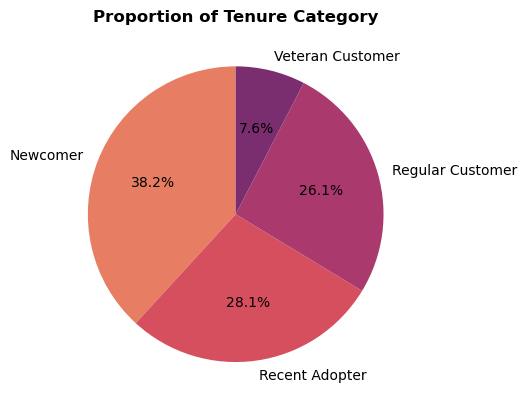

In [16]:
# group by tenure category
df3 = df_eda.groupby('TenureCategory').agg(Amount=('CustomerID','count'))

# create pie chart
plt.pie(x=df3['Amount'],
        labels=df3.index,
        startangle=90,
        colors=sns.color_palette('flare', n_colors=4),
        autopct='%1.1f%%')
plt.title('Proportion of Tenure Category', fontweight='bold')
plt.show()

From the chart above, we can see that most of our customers are newcomers with 38.2%, followed by recent adopters, regular customers, and veteran customers with only 7.6%. The company seems to have attracted a lot of new customers within the past year, proven by 66.3% of our customers have a tenure of under 12 months.

Now let's divide it to churn and not churned customer, to see if there are any patterns.

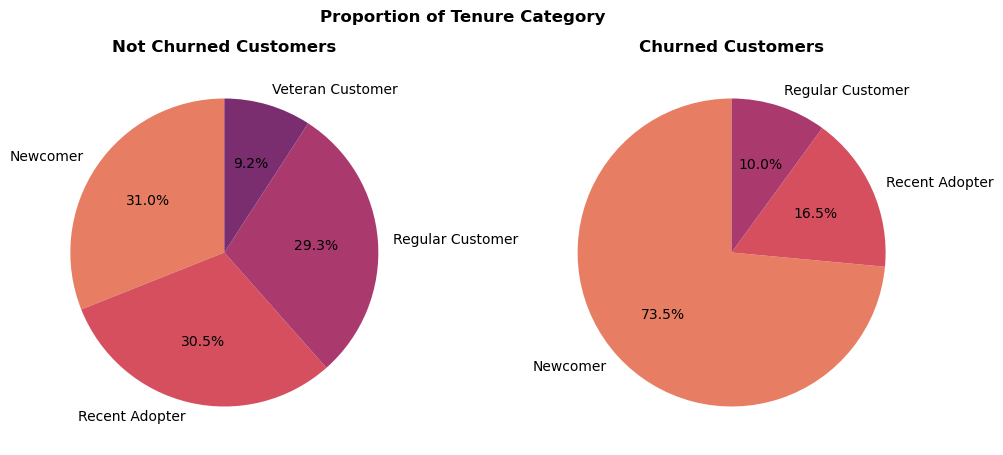

In [17]:
# split dataset based on churn
df3_1 = df_eda.loc[df_eda['Churn'] == 0, :]
df3_2 = df_eda.loc[df_eda['Churn'] == 1, :]

# group by tenure category
df3_1 = df3_1.groupby('TenureCategory').agg(Amount=('CustomerID','count'))
df3_2 = df3_2.groupby('TenureCategory').agg(Amount=('CustomerID','count'))

# create figure
fig,ax = plt.subplots(ncols=2, figsize=(12,5))
fig.suptitle('Proportion of Tenure Category', fontweight='bold')

# not churn pie chart
ax[0].pie(x=df3_1['Amount'],
        labels=df3_1.index,
        startangle=90,
        colors=sns.color_palette('flare', n_colors=4),
        autopct='%1.1f%%')
ax[0].set_title('Not Churned Customers',fontweight='bold')

# churn pie chart
ax[1].pie(x=df3_2['Amount'],
        labels=df3_2.index,
        startangle=90,
        colors=sns.color_palette('flare', n_colors=4),
        autopct='%1.1f%%')
ax[1].set_title('Churned Customers',fontweight='bold')

plt.show()

We can see some interesting insights from the charts above. The pattern for the not churned customers follows the previous proportions from the previuous pie chart of all the customers. The interesting one is the churned customers proportions, 73.5% of churned customers are newcomers, which means that they only lasted a few months using our platform. We can also see that no veteran customers have churned, showing that they truly have high loyalty to the platform.

We previously inferred that the company recently attracted many new customers (Newcomer), especially within the last 6 months. And from the pie chart, we can see that most of our churned customers are these newcomers. It seems the company's recent campaign have successfully attracted many new customers, but they weren't able to rettain these customers. These newcomers seems to be interested in using the platform, but failed to find a reason to keep using it. 

## **Is there a difference in the order amount between churned and non-churned customers?**
We saw previously that churned customers are mostly newcomers. I speculize that these newcomers, and other churned customers, were only interested to do very few purchases, then left because they lost interest. To make sure, let's do a hypothesis testing. Our hypothesis on this case are:
- **H0: `OrderCount` median of churned customer is not lower than not churned customer**
- **H1: `OrderCount` median of churned customer is lower than not churned customer**

Below we can see that the column is skewed, so we should use a non-parametric hypothesis test which uses the median of the data. For this, we'll use the Mann-Whitney U test as it doesn't assumes normality on the data ([source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/mann-whitney-u-test/)).

In [18]:
# check skewness
print(f'OrderCount skewness: {df_eda.OrderCount.skew():.2f}')

OrderCount skewness: 2.28


In [19]:
# create samples
sample1 = df_eda.loc[df_eda['Churn'] == 1, 'OrderCount']
sample2 = df_eda.loc[df_eda['Churn'] == 0, 'OrderCount']

# hypothesis test
stat,p = stats.mannwhitneyu(sample1,sample2,alternative='less')

# interpret result
if p > 0.05:
    print('H0 Accepted, OrderCount median of churned customer is not lower than not churned customer')
else:
    print(f'P-value: {p:.3f}\nH0 rejected, OrderCount median of churned customer is lower than not churned customer')

P-value: 0.015
H0 rejected, OrderCount median of churned customer is lower than not churned customer


It seems that our speculization was right, churned customers tend to have lower order count. This can mean that these customers were probably only interested to do few purchases before eventually leaving the platform. Let's see how far the difference actually is.

In [20]:
# groupby churn to calculate order count mean and median
df4 = df_eda.groupby('Churn').agg(OrderCountMedian=('OrderCount','median'),
                                  OrderCountMean=('OrderCount','mean'))

# show result
df4

,OrderCountMedian,OrderCountMean
Churn,,
0,2.0,2.992952
1,2.0,2.808017


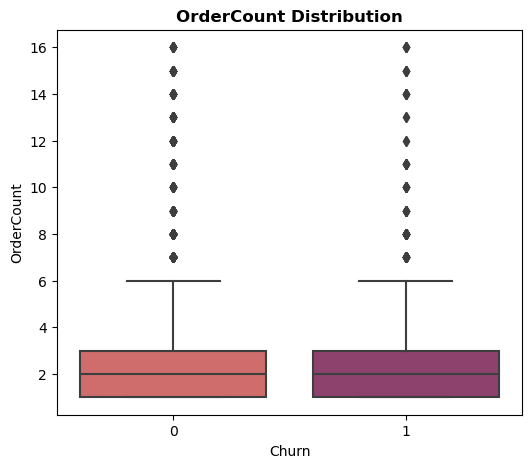

In [21]:
# create boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_eda,
            x='Churn',
            y='OrderCount',
            palette=sns.color_palette('flare', n_colors=len(df_eda['Churn'].unique())))
plt.title('OrderCount Distribution', fontweight='bold')
plt.show()

Eventhough our hypothesis was accepted that churned customer's median of order amount is lower, the results above that the difference is actually not far. both have the same median and churned customer's mean is just slightly lower. 

This means that yes, churned customers tend to order fewer product, but the difference is not that significant that it shows the reason why customers decide to churn. This result also supports the correlation result we got between `OrderCount` and `Churn`. The result was very low at -0.024, which shows no correlation.

## **How are our customer demographics?**
Let's start exploring our customer's demographic, this can give us a better idea of who are our customers. Demographic includes `CityTier`, `Gender`, and `MaritalStatus`.

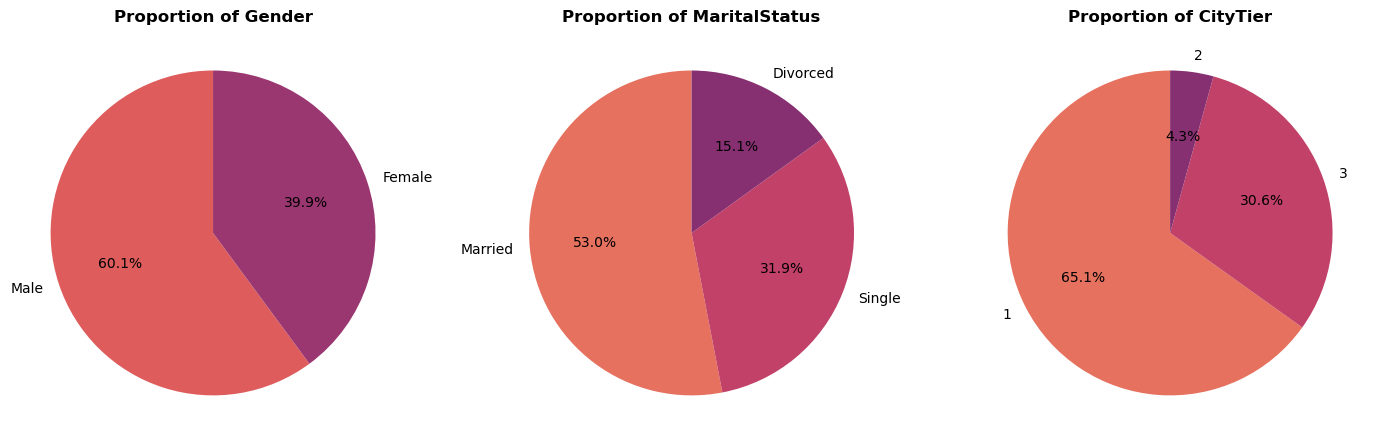

In [22]:
# demograpic features
demo_cols = ['Gender', 'MaritalStatus', 'CityTier']

# create figure
fig = plt.figure(figsize=(14, 5))
fig_rows = 1
fig_cols = 3

# loop each column
for index in range(1, len(demo_cols) + 1):
  col = demo_cols[index-1]
  df5 = df_eda.groupby(col).agg(UserCount=('CustomerID','count')).sort_values('UserCount',ascending=False)
  ax = fig.add_subplot(fig_rows, fig_cols, index)
  ax.pie(x=df5['UserCount'],
         labels=df5.index,
         startangle=90,
         colors=sns.color_palette('flare', n_colors=len(df5.index)),
         autopct='%1.1f%%')
  ax.set_title(f'Proportion of {col}', fontweight='bold')

# show figure
plt.tight_layout()
plt.show()

- Our customers are mostly male having a percentage of 60.1%, while female customers have 39.9%. The proportions are pretty balanced, there's no gender that dominates our customer demographic. In future decisions, we should minimize favorating one gender, as our the proportions are pretty balanced.
- Most of our customers are married having a percentage of 53%, followed by single having 31.9%, and divorced having only 15.1%. Married customers may tend to use ecommerce platforms more to order items for their family and household.
- A big portion of our customers comes from city tier 1 having a percentage of 65.1%, followed by tier 3 with 30.6%, and tier 2 having only 4.3%. Our dataset doesn't provide any information about what these tier means, but it makes sense that tier 1 is the highest as it is supposed to have the better facilitation and infrastructure to support ecommerce transactions.

## **What are the most popular item category ordered?**
Next, let's explore some behaviour of our customers. Let's see what product category are our customers most interested in.

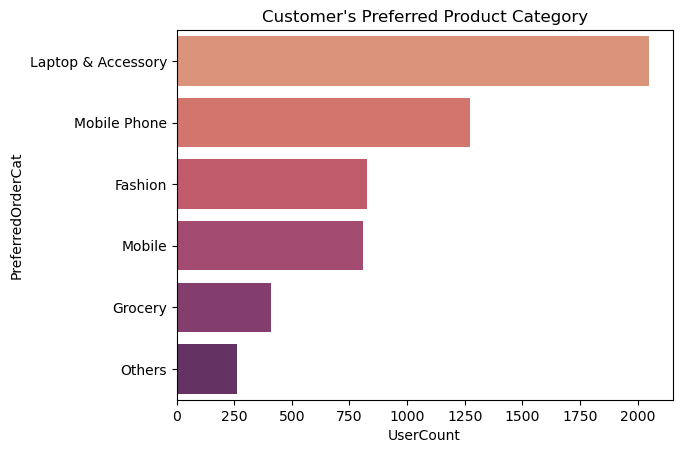

In [23]:
# group by preferred order cat
df6 = df_eda.groupby('PreferredOrderCat', as_index=False).agg(UserCount=('CustomerID','count')).sort_values('UserCount',ascending=False)

# creat bar chart
sns.barplot(data=df6,
            x=df6['UserCount'],
            y=df6['PreferredOrderCat'],
            palette=sns.color_palette('flare', n_colors=len(df6['PreferredOrderCat'].unique())))
plt.title('Customer\'s Preferred Product Category')
plt.show()

From the chart above, we can see that laptop & accessory are the most popular product category preferred by our customers. The second most popular is mobile phone, which means a big portion of our customers prefer to order technologies from our platform. I think it will be interesting if we compare what each gender like to order, so let's check it.

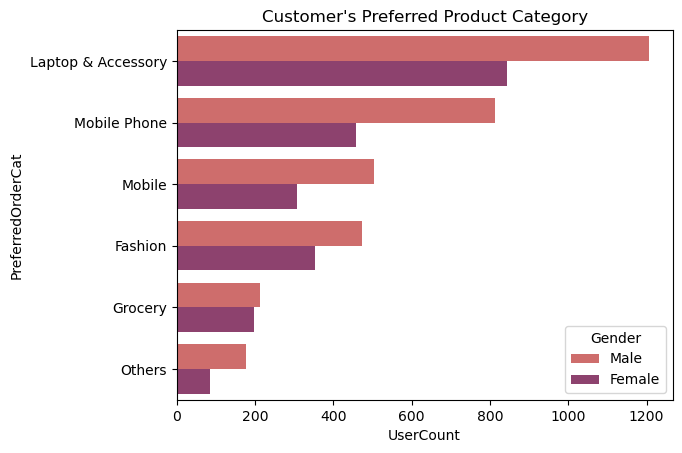

In [24]:
# group by preferred order cat and gender
df6 = df_eda.groupby(['PreferredOrderCat','Gender'], as_index=False).agg(UserCount=('CustomerID','count')).sort_values('UserCount',ascending=False)

# create bar chart
sns.barplot(data=df6,
            x='UserCount',
            y='PreferredOrderCat',
            hue='Gender',
            palette=sns.color_palette('flare', n_colors=len(df6['Gender'].unique())))
plt.title('Customer\'s Preferred Product Category')
plt.show()

Eventhough the usual stigma is that male and female have different preferences in items, it seems that's not the case here. Both gender almost have identical preferences, the only difference is female prefer fashion more than mobile, while male prefers mobile more. Other than that, Laptop & Accessory and Mobile phone are still the two most preferred category on both gender. This shows that our most of our customer loves technology.

## **What device are most used by our customers? And does this affect their time spent on the platform?**
Another customer behavior that I'm interested at is what device is most used to order products. Let's check it.

In [25]:
# group by preferred login device
df_eda.groupby('PreferredLoginDevice').agg(UserCount=('CustomerID','count')).sort_values('UserCount',ascending=False)

,UserCount
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


From my understanding, mobile phone and phone is the same type of device. So, let's change phone to just be mobile phone.

In [26]:
# change value
df_eda.loc[df_eda['PreferredLoginDevice'] == 'Phone','PreferredLoginDevice'] = 'Mobile Phone'

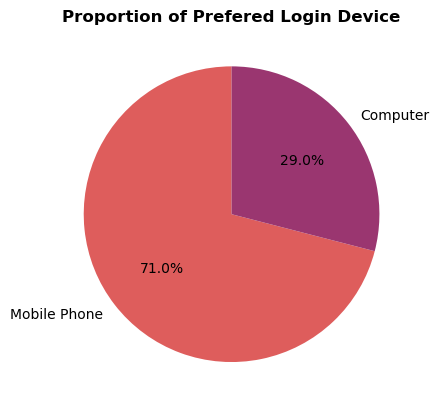

In [27]:
# group by preferred login device
df7 = df_eda.groupby('PreferredLoginDevice').agg(UserCount=('CustomerID','count')).sort_values('UserCount',ascending=False)

# create pie chart
plt.pie(x=df7['UserCount'],
        labels=df7.index,
        startangle=90,
        colors=sns.color_palette('flare', n_colors=len(df7.index)),
        autopct='%1.1f%%')
plt.title('Proportion of Prefered Login Device', fontweight='bold')
plt.show()

From the chart above, we can see that the majority of our customers prefer ordering from their mobile phone with 71%. This makes sense, as mobile phones are more compact and easier to use for scrolling and shopping online. Now let's see if there's a difference in average time spent between devices. The column `HourSpendOnApp` doesn't explicitly tell if it's daily, weekly, or something else. Because it ranges to 5 and most customers order count is low, I'll assume this is monthly hour spent on app.

In [28]:
# average hour of each device
df7_2 = df_eda.groupby('PreferredLoginDevice',as_index=False).agg(AverageHour=('HourSpendOnApp','mean')).sort_values('AverageHour',ascending=False)

# show result
df7_2

,PreferredLoginDevice,AverageHour
1,Mobile Phone,2.940359
0,Computer,2.909954


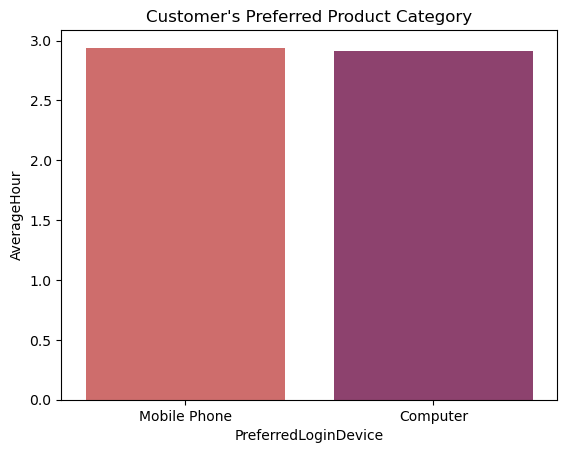

In [29]:
# creat bar chart
sns.barplot(data=df7_2,
            x='PreferredLoginDevice',
            y='AverageHour',
            palette=sns.color_palette('flare', n_colors=len(df7_2['PreferredLoginDevice'].unique())))
plt.title('Customer\'s Preferred Product Category')
plt.show()

From the result we can see that both device have the same average hour spent on. This is a bit surprising for me, as I thought customers will tend to spend more time on the app if their using mobile phone, but that doesn't seem to be the case. Customers using either device averages around 2.9 hours spent on the app monthly.

I think that's enough exploring. Our goal is to create a model to predict customer churn, so let's head on to the next section.

___
# **Feature Engineering**
Before we train the model, we'll transform our data to make it suitable for our model training through feature engineering.

## **Cardinality Check**
The first step is to check the cardinality of our categorical columns. A categorical column with many high cardinality (many unique values) may decrease the model's performance, so it's better to check these columns to get an idea of the data that we're facing.

In [30]:
# check cardinality in categorical columns
for col in cat_cols:
    print(f'Unique values in {col}\n{df[col].unique()}\n')

Unique values in PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

Unique values in PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Unique values in Gender
['Female' 'Male']

Unique values in PreferredOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Unique values in MaritalStatus
['Single' 'Divorced' 'Married']

Unique values in CityTier
[3 1 2]

Unique values in SatisfactionScore
[2 3 5 4 1]

Unique values in Complain
[1 0]



From the output above, it seems that all of our categorical columns have low cardinality, shown by low amount of uniqeu value. But it seems there are some some value that have the same meaning with other values.
- in `PreferredLoginDevice`, 'Mobile Phone' and 'Phone' has the same meaning. We'll convert 'Phone' into 'Mobile Phone'.
- in `PreferredPaymentMode`, 'CC' has the same meaning as 'Credit Card' and 'COD' has the same meaning as 'Cash on Delivery'. We'll convert 'CC' into 'Credit Card' and 'COD' into 'Cash on Delivery'.

We should handle thes values to avoid redundancy.

In [31]:
# convert values
df.loc[df['PreferredLoginDevice'] == 'Phone','PreferredLoginDevice'] = 'Mobile Phone'
df.loc[df['PreferredPaymentMode'] == 'CC','PreferredPaymentMode'] = 'Credit Card'
df.loc[df['PreferredPaymentMode'] == 'COD','PreferredPaymentMode'] = 'Cash on Delivery'

## **Feature Creation**
From the previous EDA section, we created a new feature that categorizes customers based on their tenure length. Let's create the same feature here, so our model can learn better informations about our customer's tenure.

In [32]:
# create new column
df['TenureCategory'] = np.nan

# categorize customer
df.loc[df['Tenure'] <= 6, 'TenureCategory'] = 'Newcomer' 
df.loc[(df['Tenure'] >= 7) & (df['Tenure'] <= 12), 'TenureCategory'] = 'Recent Adopter' 
df.loc[(df['Tenure'] >= 13) & (df['Tenure'] <= 24), 'TenureCategory'] = 'Regular Customer'
df.loc[df['Tenure'] > 24, 'TenureCategory'] = 'Veteran Customer' 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20036\3909226450.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Newcomer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Tenure'] <= 6, 'TenureCategory'] = 'Newcomer'


In [33]:
# unique values in tenure category
df.TenureCategory.unique()

array(['Newcomer', nan, 'Regular Customer', 'Recent Adopter',
       'Veteran Customer'], dtype=object)

We've successfully created the new feature, but as we can see, there's a missing value inside the feature. This is maskes sense, because we previously say that `Tenure` has some missing values. So, automatically the `TenureCategory` of these rows weren't affected. We'll handle these values later in missing value handling.

## **Train Test Split**
We will now split our data into train and test set. It's important that we split the dataset now befor other feature engineering steps to avoid data leakage.

In [34]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], 
                                                        test_size=0.2, random_state=42, stratify=df['Churn'])

# check train and test dataset shape
print('Train set shape : ', x_train.shape)
print('Test set shape  : ', x_test.shape)

Train set shape :  (4504, 20)
Test set shape  :  (1126, 20)


## **Outlier Handling**
We will now check for outliers in our dataset. Outliers may appear in our data for many reasons, let's try to identify if there are any outliers in our dataset.

To determine how we check the outliers, we need to see the data's distribution first. We'll see the distribution by checking the skewness. If it doesn't range from -0.5 to 0.5, it usually means the data doesn't have a normal distribution. We'll also use the QQ plot visualization, if the data distribution doesn't follow the 45° line, then it doesn't have a normal distribution.

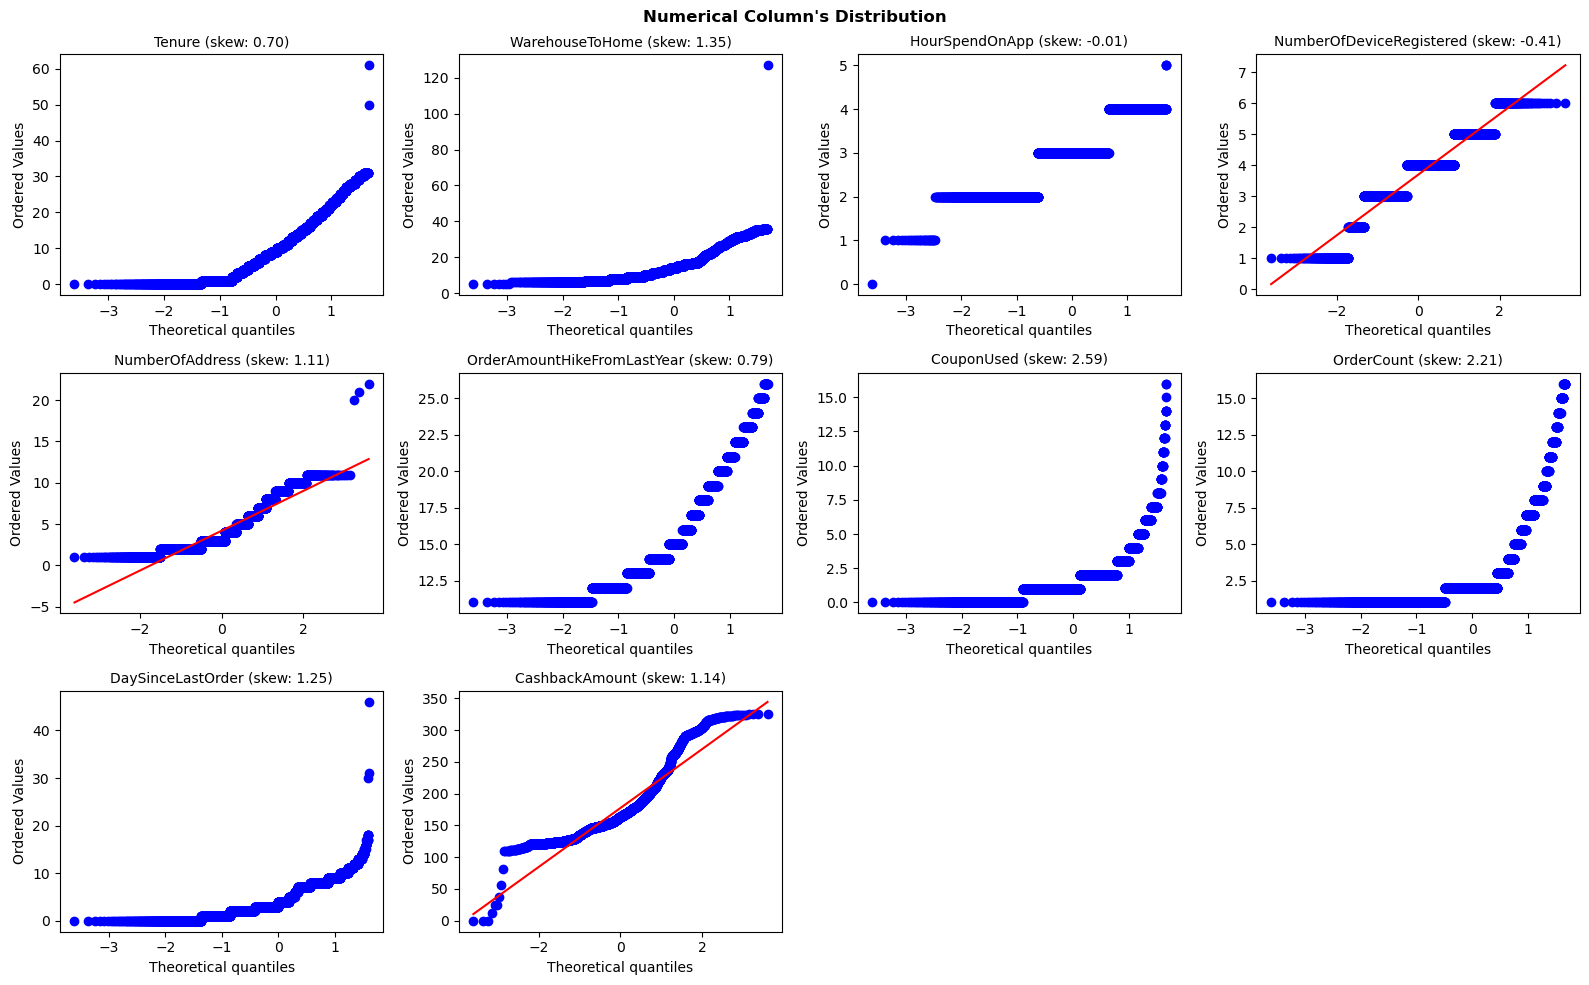

In [35]:
# create chart
fig = plt.figure(figsize=(16, 10))
fig_rows = 3
fig_cols = 4
fig.suptitle('Numerical Column\'s Distribution', fontweight='bold')

# loop each columns distirbution
for index in range(1, len(num_cols) + 1):
  col = num_cols[index-1]
  skewness = x_train[col].skew()
  ax = fig.add_subplot(fig_rows, fig_cols, index)
  stats.probplot(x_train[col], dist="norm", plot=ax)
  ax.set_title(f'{col} (skew: {skewness:.2f})', fontdict={'size':10})

# show figure
plt.tight_layout()
plt.show()

From the output above, we can conclude that `HourSpendOnApp` and `NumberOfDeviceRegistered` has normal distribution. While the rest doesn't have a normal distribution.

For columns with normal distribution, we'll use z-score to check for their outliers. And for columns that don't have normal distribution, we'll use Tukey's rule.

In [36]:
# create list to store values
dist_list = []
pct_list = []

# loop each column
for col in num_cols:
  # calculate skewness
  skewness = x_train[col].skew()

  # if normal, use z-score
  if (skewness > -0.5) & (skewness < 0.5):
    dist_list.append('Normal')
    low_bound = x_train[col].mean() - 3* x_train[col].std()
    up_bound = x_train[col].mean() + 3* x_train[col].std()

  # if not normal, use tukey's rule
  else:
    dist_list.append('Not Normal')
    iqr = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
    low_bound = x_train[col].quantile(0.25) - (iqr * 1.5)
    up_bound = x_train[col].quantile(0.75) + (iqr * 1.5)

  # count outliers
  outlier = x_train[(x_train[col] < low_bound) | (x_train[col] > up_bound)]
  outlier_percentage = round(len(outlier)/len(x_train)*100,2)
  pct_list.append(outlier_percentage)

# convert into dataframe
pd.DataFrame({'Columns':num_cols,
              'Distribution':dist_list,
              'Outlier Rercentage':pct_list})

,Columns,Distribution,Outlier Rercentage
0,Tenure,Not Normal,0.04
1,WarehouseToHome,Not Normal,0.02
2,HourSpendOnApp,Normal,0.02
3,NumberOfDeviceRegistered,Normal,0.00
4,NumberOfAddress,Not Normal,0.07
5,OrderAmountHikeFromLastYear,Not Normal,0.62
6,CouponUsed,Not Normal,11.15
7,OrderCount,Not Normal,12.10
8,DaySinceLastOrder,Not Normal,0.93
9,CashbackAmount,Not Normal,7.62


From the output above, only three columns have an outlier percentage above 5%, which are `CouponUsed`, `OrderCount`, and `CashbackAmount`. Let's visualize the distribution of these three columns.

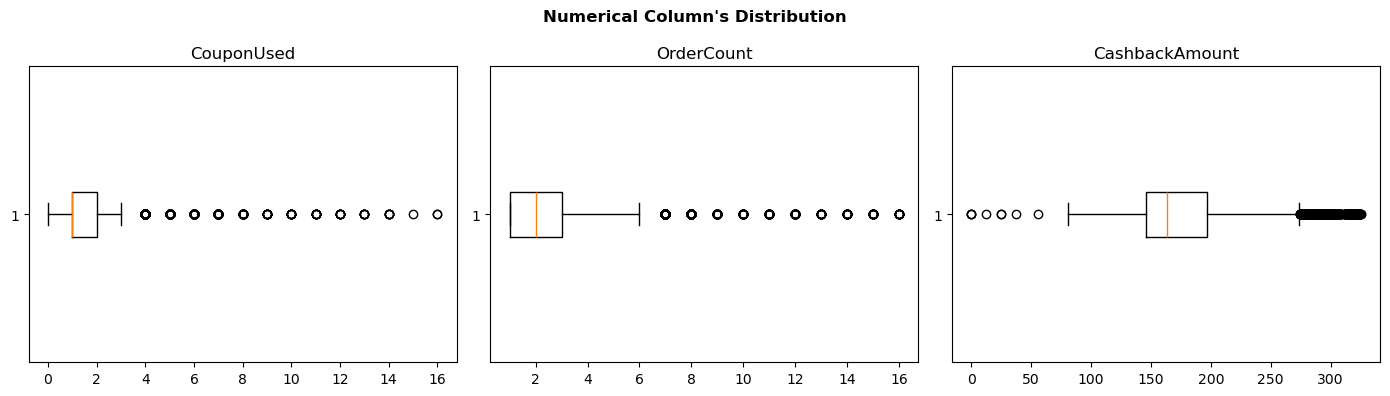

In [37]:
# create chart
fig = plt.figure(figsize=(14, 4))
fig_rows = 1
fig_cols = 3
fig.suptitle('Numerical Column\'s Distribution', fontweight='bold')

# loop each columns distirbution
out_cols = ['CouponUsed', 'OrderCount', 'CashbackAmount']
for index in range(1, len(out_cols) + 1):
  col = out_cols[index-1]
  ax = fig.add_subplot(fig_rows, fig_cols, index)
  ax.boxplot(x_train[col].dropna(), vert=False)     # temporarily drop missing value for boxplot
  ax.set_title(col)

# show figure
plt.tight_layout()
plt.show()

- Outliers at `CouponUsed` seems to be when the value is above 3, with the hihgest being 16 coupon used.
- Outliers at `OrderCount` seems to be when the value is above 6, with the highest also being 16 orders.
- Outliers at `CasbackAmount` seems to appear both below the lower boundary and above the upper boundry, but most outliers are above the upper boundary

The pattern of outlies at `CouponUsed` and `OrderCount` seems to be familiar, they also have similiar percentage of outliers. Let's check these rows with high values.

In [38]:
# check high value at coupon used
x_train[['CouponUsed', 'OrderCount']].sort_values('CouponUsed', ascending=False).head(10)

,CouponUsed,OrderCount
4585,16.0,16.0
3442,16.0,16.0
627,15.0,15.0
5136,14.0,NaN
3627,14.0,16.0
3117,14.0,14.0
4813,14.0,15.0
3343,14.0,15.0
3551,13.0,16.0
961,13.0,NaN


In [39]:
# check correlation
x_train[['CouponUsed', 'OrderCount']].corr('spearman')

,CouponUsed,OrderCount
CouponUsed,1.000000,0.727492
OrderCount,0.727492,1.000000


From the result above we can see that when `CouponUsed` is high, `OrderCount` is also high. This makes sense as the more you order, the more coupons that you may use. This statement is also proven by the high correlation score between these column, with a score of 0.72. This shows that these outliers are natural values and isn't an error.

Now lets check the outliers at `CashbackAmount`. We'll only check the high values because most of the outliers are above the upper boundary and it makes sense if a customer receives minimal amount of cashback.

In [40]:
# check high values at casback amount
x_train.sort_values('CashbackAmount', ascending=False).head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
2880,52881,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,5,Others,3,Divorced,2,0,15.0,2.0,12.0,10.0,324.99,Veteran Customer
4350,54351,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,5,Others,3,Married,2,0,15.0,8.0,12.0,10.0,324.99,Veteran Customer
3436,53437,15.0,Computer,1,14.0,Debit Card,Female,3.0,6,Others,3,Married,3,0,23.0,2.0,6.0,11.0,324.73,Regular Customer
4906,54907,15.0,Computer,1,14.0,Debit Card,Female,3.0,6,Others,3,Married,3,0,23.0,6.0,6.0,11.0,324.73,Regular Customer
5011,55012,30.0,Mobile Phone,1,11.0,Cash on Delivery,Female,4.0,4,Others,5,Married,6,0,14.0,5.0,5.0,3.0,324.43,Veteran Customer
3541,53542,30.0,Mobile Phone,1,11.0,Cash on Delivery,Female,4.0,4,Others,5,Married,6,0,14.0,1.0,5.0,3.0,324.43,Veteran Customer
2855,52856,24.0,Mobile Phone,1,18.0,Debit Card,Female,3.0,4,Others,4,Single,5,0,16.0,3.0,5.0,5.0,324.26,Regular Customer
4325,54326,24.0,Mobile Phone,1,18.0,Debit Card,Female,3.0,4,Others,4,Single,5,0,16.0,1.0,5.0,5.0,324.26,Regular Customer
4728,54729,19.0,Mobile Phone,1,9.0,Credit Card,Male,4.0,4,Others,5,Married,7,1,14.0,2.0,2.0,5.0,323.59,Regular Customer
3608,53609,25.0,Computer,3,16.0,Debit Card,Male,3.0,4,Others,4,Married,6,1,25.0,3.0,12.0,11.0,323.47,Veteran Customer


In [41]:
# check correlation
x_train[['Tenure', 'CashbackAmount']].corr('spearman')

,Tenure,CashbackAmount
Tenure,1.000000,0.453429
CashbackAmount,0.453429,1.000000


From the output above, we can see that customers with high cashback amount tend to have a higher tenure. This statement is also proven by a the correlation score of 0.45 between `CashbackAmount` and `Tenure`. This sort of makes sense, the longer you've been using the platform, the more cashback privileges you'll get. This shows that these outliers are natural values and isn't an error.

Becuase all of the outliers are natural values, we won't be handling them. Our goal is to create a model that's able to predict the likeliness of customer churn and we want it to be as realistic as possible. If we manipulate the data (outliers), we might not get model that represent the actual situation. So, we'll keep these outliers in the dataset.

## **Missing Value Handling**
We previously saw that there are some missing values in our dataset. Let's check them again.

In [42]:
# check missing values
mis_train = pd.DataFrame({'mis_val':x_train.isna().sum(),
                          'percentage':round(x_train.isna().sum()/len(x_train)*100,2)})

# show missing value from all rows
mis_row = len(x_train[x_train.isna().any(axis=1) == True])
print(f'Rows with mis val: {mis_row}({round(mis_row/len(df)*100,2)}%)')

# show missing value in each column
mis_train[mis_train['mis_val'] > 0]

Rows with mis val: 1491(26.48%)


,mis_val,percentage
Tenure,213,4.73
WarehouseToHome,206,4.57
HourSpendOnApp,197,4.37
OrderAmountHikeFromLastYear,208,4.62
CouponUsed,208,4.62
OrderCount,212,4.71
DaySinceLastOrder,247,5.48
TenureCategory,213,4.73


The percentage is still similair as we saw before, but the values have decreased because we splitted our data. There is also now an extra feature that has missing value, which is the feature that we previously created. Let's check these missing values to determine a missing value handling strategy for each feature. We'll start by checking the missing values at `CouponUsed` and `OrderCount`.

In [43]:
# rows with missing value on coupon used
x_train[x_train['CouponUsed'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
788,50789,8.0,Mobile Phone,3,8.0,E wallet,Female,3.0,5,Others,4,Single,3,1,16.0,NaN,1.0,11.0,288.24,Recent Adopter
3114,53115,31.0,Mobile Phone,3,36.0,E wallet,Male,3.0,5,Grocery,2,Married,5,0,13.0,NaN,2.0,1.0,266.18,Veteran Customer
733,50734,26.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,3,Others,3,Married,4,0,18.0,NaN,4.0,7.0,286.06,Veteran Customer
812,50813,12.0,Mobile Phone,1,19.0,Credit Card,Female,3.0,4,Grocery,4,Married,7,1,13.0,NaN,15.0,2.0,271.23,Recent Adopter
5170,55171,29.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,2,Grocery,1,Married,4,0,14.0,NaN,2.0,1.0,272.32,Veteran Customer
779,50780,21.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,2,Single,7,0,12.0,NaN,1.0,0.0,282.65,Regular Customer
330,50331,6.0,Mobile Phone,1,6.0,Credit Card,Female,3.0,2,Grocery,3,Married,5,0,19.0,NaN,1.0,5.0,261.84,Newcomer
4539,54540,29.0,Mobile Phone,1,9.0,Debit Card,Female,4.0,4,Grocery,1,Single,4,1,14.0,NaN,2.0,3.0,291.59,Veteran Customer
410,50411,14.0,Mobile Phone,2,16.0,UPI,Male,3.0,4,Others,2,Married,4,0,15.0,NaN,12.0,6.0,291.41,Regular Customer
2369,52370,20.0,Mobile Phone,1,8.0,Credit Card,Female,2.0,3,Grocery,3,Married,4,0,19.0,NaN,5.0,6.0,271.69,Regular Customer


In [44]:
# rows with missing value on order count
x_train[x_train['OrderCount'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
1052,51053,23.0,Mobile Phone,1,23.0,Debit Card,Female,2.0,4,Fashion,5,Married,6,0,15.0,1.0,NaN,11.0,232.69,Regular Customer
5194,55195,19.0,Mobile Phone,1,27.0,Credit Card,Male,4.0,6,Fashion,5,Married,4,1,19.0,2.0,NaN,8.0,233.51,Regular Customer
4670,54671,28.0,Mobile Phone,2,26.0,Credit Card,Male,3.0,4,Fashion,4,Married,4,0,16.0,3.0,NaN,2.0,232.25,Veteran Customer
2958,52959,19.0,Mobile Phone,1,27.0,Credit Card,Male,4.0,4,Grocery,2,Divorced,2,1,15.0,1.0,NaN,11.0,259.96,Regular Customer
5565,55566,5.0,Computer,1,17.0,Credit Card,Female,3.0,4,Fashion,3,Married,6,0,21.0,4.0,NaN,9.0,235.31,Newcomer
3765,53766,6.0,Mobile Phone,1,17.0,Credit Card,Male,1.0,4,Fashion,1,Single,4,0,26.0,1.0,NaN,1.0,237.44,Newcomer
1185,51186,30.0,Computer,1,21.0,Debit Card,Male,2.0,3,Grocery,3,Married,3,1,14.0,1.0,NaN,2.0,257.87,Veteran Customer
4888,54889,28.0,Mobile Phone,1,24.0,Cash on Delivery,Female,3.0,4,Fashion,3,Married,10,0,12.0,1.0,NaN,9.0,232.39,Veteran Customer
4561,54562,30.0,Computer,3,13.0,Debit Card,Female,3.0,2,Grocery,5,Married,11,0,12.0,7.0,NaN,8.0,257.12,Veteran Customer
3110,53111,3.0,Mobile Phone,1,10.0,Credit Card,Male,4.0,5,Fashion,3,Divorced,3,0,19.0,2.0,NaN,8.0,244.35,Newcomer


There isn't really any pattern that we can find that explains why these columns have missing values. And because these missing values contributes to only below 5% of the whole data, respectively, we'll conclude that these missing values are Missing Completely at Random (MCAR).

We previuosly saw that both of these columns have a correlation, meaning the higher `OrderCount` is, the higher `CouponUsed` is. And because the range of these columns is pretty low, we can refer to each column and impute the missing value using the median based grouped by the value on the other column. For example, if `OrderCount` is 16 and `CouponUsed` is NaN, we'll calculate the median of `CouponUsed` when `OrderCount` equals to 16, and impute the missing value with that median.

In [45]:
# create new dataframe
x_train_clean = x_train.copy()
x_test_clean = x_test.copy()

In [46]:
# loop each coupon used unique value
for val in x_train_clean['CouponUsed'].dropna().unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['CouponUsed'] == val,'OrderCount'].median()

    # impute missing values on train and test using median of train
    x_train_clean.loc[(x_train_clean['CouponUsed'] == val) & (x_train_clean['OrderCount'].isna()),'OrderCount'] = imp_val
    x_test_clean.loc[(x_test_clean['CouponUsed'] == val) & (x_test_clean['OrderCount'].isna()),'OrderCount'] = imp_val

In [47]:
# loop each coupon used unique value
for val in x_train_clean['OrderCount'].dropna().unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['OrderCount'] == val,'CouponUsed'].median()

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['OrderCount'] == val) & (x_train_clean['CouponUsed'].isna()),'CouponUsed'] = imp_val
    x_test_clean.loc[(x_test_clean['OrderCount'] == val) & (x_test_clean['CouponUsed'].isna()),'CouponUsed'] = imp_val

Next, let's check the missing values at `Tenure`.

In [48]:
# rows with missing value on tenure
x_train_clean[x_train_clean['Tenure'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
2104,52105,NaN,Mobile Phone,2,30.0,Credit Card,Male,2.0,3,Mobile,4,Single,2,0,16.0,0.0,1.0,4.0,121.77,NaN
1617,51618,NaN,Mobile Phone,1,15.0,Credit Card,Male,3.0,3,Mobile,1,Married,2,0,23.0,1.0,1.0,4.0,120.70,NaN
1744,51745,NaN,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Mobile,5,Married,2,0,12.0,3.0,3.0,2.0,122.18,NaN
1552,51553,NaN,Computer,1,24.0,Credit Card,Female,3.0,3,Mobile,1,Single,2,0,13.0,0.0,1.0,7.0,121.53,NaN
530,50531,NaN,Mobile Phone,2,9.0,UPI,Male,2.0,3,Mobile,4,Married,4,1,11.0,0.0,1.0,3.0,122.77,NaN
2550,52551,NaN,Mobile Phone,1,8.0,Debit Card,Male,3.0,3,Mobile Phone,4,Single,2,0,12.0,0.0,1.0,0.0,113.93,NaN
1228,51229,NaN,Computer,1,22.0,Cash on Delivery,Male,2.0,5,Mobile,5,Married,2,1,23.0,3.0,3.0,0.0,123.07,NaN
1702,51703,NaN,Computer,3,6.0,Cash on Delivery,Female,3.0,4,Mobile,4,Single,2,1,11.0,1.0,1.0,2.0,121.74,NaN
1630,51631,NaN,Mobile Phone,1,6.0,Debit Card,Female,2.0,3,Mobile,1,Single,2,0,12.0,1.0,5.0,7.0,121.15,NaN
1641,51642,NaN,Mobile Phone,1,9.0,Debit Card,Male,2.0,3,Mobile Phone,3,Single,2,0,13.0,1.0,1.0,0.0,114.20,NaN


In [49]:
# check value count on preferred order category
x_train_clean[x_train_clean['Tenure'].isna()][['PreferredOrderCat']].value_counts()

PreferredOrderCat 
Mobile                168
Mobile Phone           35
Laptop & Accessory     10
Name: count, dtype: int64

In [50]:
# calculate correlation using anova
f,p = stats.f_oneway( x_train_clean[x_train_clean['PreferredOrderCat'] == 'Fashion']['Tenure'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Laptop & Accessory']['Tenure'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile Phone']['Tenure'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Others']['Tenure'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile']['Tenure'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Grocery']['Tenure'].dropna()
)

# show result
print(f'P-value: {p:.3f}')

P-value: 0.000


In [51]:
# tenure median of each order cateogory
x_train_clean.groupby('PreferredOrderCat').agg(median=('Tenure','median'))

,median
PreferredOrderCat,
Fashion,11.0
Grocery,21.0
Laptop & Accessory,8.0
Mobile,4.0
Mobile Phone,3.0
Others,21.0


From a quick inspection, we can see that when `Tenure` is missing, most `PreferredOrderCat` is Mobile. And from the value count above we can see that it's true. We previously saw that Mobile is only the 4th most common `PreferredOrderCat`, but here we can see it's the most common cateogory. This is also further supported by `Tenure` and `PreferredOrderCat` having a correlation, proven by a p_value under 0.05 on the anova test. We can also see that almost all the median of `Tenure` from each order category differs from each other. From this, we can conclude that the missing value in `Tenure` is Missing At Random (MAR), this is because missing values mostly appear when `PreferredOrderCat` is 'Mobile' (Not a coincidence).

We'll impute these missing values using the `Tenure` median from each order category in `PreferredOrderCat`.

In [52]:
# loop each preferred order category unique value
for val in x_train_clean['PreferredOrderCat'].unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['PreferredOrderCat'] == val,'Tenure'].median()

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['PreferredOrderCat'] == val) & (x_train_clean['Tenure'].isna()),'Tenure'] = imp_val
    x_test_clean.loc[(x_test_clean['PreferredOrderCat'] == val) & (x_test_clean['Tenure'].isna()),'Tenure'] = imp_val

Next we'll handle missing values `TenureCategory`. This is a feature we previuosly created, and we also know that the missing values in this feature is caused by missing values at `Tenure`. When `Tenure` is missing, `TenureCategory` wasn't able to categorize the customer. Therefore, we can conclude that missing values in `TenureCategory` is Missing At Random (MAR).

We'll impute these missing values with the same way of how we initially filled this feature.

In [53]:
# fill values on train set
x_train_clean.loc[x_train_clean['Tenure'] <= 6, 'TenureCategory'] = 'Newcomer' 
x_train_clean.loc[(x_train_clean['Tenure'] >= 7) & (x_train_clean['Tenure'] <= 12), 'TenureCategory'] = 'Recent Adopter' 
x_train_clean.loc[(x_train_clean['Tenure'] >= 13) & (x_train_clean['Tenure'] <= 24), 'TenureCategory'] = 'Regular Customer'
x_train_clean.loc[x_train_clean['Tenure'] > 24, 'TenureCategory'] = 'Veteran Customer' 

# fill values on test set
x_test_clean.loc[x_test_clean['Tenure'] <= 6, 'TenureCategory'] = 'Newcomer' 
x_test_clean.loc[(x_test_clean['Tenure'] >= 7) & (x_test_clean['Tenure'] <= 12), 'TenureCategory'] = 'Recent Adopter' 
x_test_clean.loc[(x_test_clean['Tenure'] >= 13) & (x_test_clean['Tenure'] <= 24), 'TenureCategory'] = 'Regular Customer'
x_test_clean.loc[x_test_clean['Tenure'] > 24, 'TenureCategory'] = 'Veteran Customer' 

Next, let's check the missing values at `WarehouseToHome`.

In [54]:
# check value count on preferred order category
x_train_clean[x_train_clean['WarehouseToHome'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
1839,51840,7.0,Mobile Phone,3,NaN,Cash on Delivery,Female,2.0,3,Mobile,3,Married,2,1,18.0,1.0,1.0,6.0,125.79,Recent Adopter
1470,51471,0.0,Mobile Phone,1,NaN,UPI,Female,2.0,4,Mobile,4,Married,2,0,19.0,2.0,4.0,3.0,123.68,Newcomer
2753,52754,0.0,Mobile Phone,1,NaN,UPI,Male,3.0,3,Mobile,1,Single,2,0,13.0,1.0,1.0,4.0,126.47,Newcomer
1465,51466,3.0,Computer,1,NaN,Debit Card,Male,3.0,5,Mobile,3,Married,2,0,25.0,0.0,1.0,9.0,126.13,Newcomer
2077,52078,0.0,Computer,1,NaN,Credit Card,Female,2.0,3,Mobile,4,Single,1,0,17.0,0.0,1.0,2.0,124.22,Newcomer
872,50873,0.0,Mobile Phone,1,NaN,Debit Card,Female,2.0,3,Mobile,3,Single,2,1,13.0,3.0,7.0,7.0,123.94,Newcomer
345,50346,0.0,Computer,3,NaN,Credit Card,Male,2.0,3,Mobile,2,Divorced,1,0,13.0,0.0,2.0,1.0,124.00,Newcomer
845,50846,0.0,Mobile Phone,3,NaN,Credit Card,Female,3.0,1,Mobile,2,Divorced,9,0,14.0,1.0,1.0,0.0,125.34,Newcomer
2020,52021,4.0,Mobile Phone,3,NaN,Debit Card,Male,2.0,4,Mobile,3,Married,4,0,15.0,2.0,5.0,2.0,123.29,Newcomer
1498,51499,18.0,Mobile Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123.48,Regular Customer


In [55]:
# calculate correlation using anova
f,p = stats.f_oneway(x_train_clean[x_train_clean['CityTier'] == 1]['WarehouseToHome'].dropna(),
                     x_train_clean[x_train_clean['CityTier'] == 2]['WarehouseToHome'].dropna(),
                     x_train_clean[x_train_clean['CityTier'] == 3]['WarehouseToHome'].dropna(),
)

print(f'P-value: {p:.3f}')

P-value: 0.348


I initially though that this column might correlate to `CityTier` because different cities might have different distance to the nearest warehouse. This speculation doesn't seem to be true thought, proven by the P-valeu being above 0.05. But if we pay attention, the missing values show up when `PreferredOrderCat` is Mobile again.

In [56]:
# check value count on preferred order category
x_train_clean[x_train_clean['WarehouseToHome'].isna()][['PreferredOrderCat']].value_counts()

PreferredOrderCat 
Mobile                198
Laptop & Accessory      8
Name: count, dtype: int64

In [57]:
# calculate correlation using anova
f,p = stats.f_oneway( x_train_clean[x_train_clean['PreferredOrderCat'] == 'Fashion']['WarehouseToHome'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Laptop & Accessory']['WarehouseToHome'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile Phone']['WarehouseToHome'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Others']['WarehouseToHome'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile']['WarehouseToHome'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Grocery']['WarehouseToHome'].dropna()
)

print(f'P-value: {p:.3f}')

P-value: 0.000


In [58]:
# tenure median of each order cateogory
x_train_clean.groupby('PreferredOrderCat').agg(median=('WarehouseToHome','median'))

,median
PreferredOrderCat,
Fashion,14.0
Grocery,13.0
Laptop & Accessory,14.0
Mobile,13.0
Mobile Phone,13.0
Others,11.0


It seems that missing values in this column follows the same cause as `Tenure`. We already know that Mobile is not the most common category, but here we can see it's the most common category again. This is also further supported by `WarehouseToHome` and `PreferredOrderCat` having a correlation, proven by a p_value under 0.05 on the anova test. Although, we can also see that the median of `WarehouseToHome` from each order category differs are pretty similair. Supported by the fact that the category mobile was correlated to some missing values on another feature, we'll conclude that the missing value in `WarehouseToHome` is also Missing At Random (MAR). It seems that there was a problem at the data gathering step for customers that prefer to order mobile products.

We'll impute these missing values using the `WarehouseToHome` median from each order category in `PreferredOrderCat`.

In [59]:
# loop each preferred order category unique value
for val in x_train_clean['PreferredOrderCat'].unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['PreferredOrderCat'] == val,'WarehouseToHome'].median()

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['PreferredOrderCat'] == val) & (x_train_clean['WarehouseToHome'].isna()),'WarehouseToHome'] = imp_val
    x_test_clean.loc[(x_test_clean['PreferredOrderCat'] == val) & (x_test_clean['WarehouseToHome'].isna()),'WarehouseToHome'] = imp_val

Next, let's check the missing values at `HourSpendOnApp`.

In [60]:
# rows with missing values on hour spend on app
x_train_clean[x_train_clean['HourSpendOnApp'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
1339,51340,0.0,Mobile Phone,3,11.0,UPI,Female,NaN,4,Mobile,3,Single,1,0,18.0,0.0,1.0,0.0,129.66,Newcomer
1848,51849,7.0,Mobile Phone,1,6.0,Debit Card,Male,NaN,3,Mobile,1,Married,2,0,12.0,1.0,8.0,8.0,126.91,Recent Adopter
890,50891,7.0,Computer,1,6.0,UPI,Male,NaN,3,Mobile,5,Married,6,0,14.0,1.0,1.0,3.0,129.96,Recent Adopter
2681,52682,28.0,Mobile Phone,1,8.0,Cash on Delivery,Male,NaN,4,Mobile,1,Married,9,0,20.0,1.0,1.0,4.0,126.62,Veteran Customer
469,50470,2.0,Mobile Phone,1,29.0,Debit Card,Male,NaN,1,Mobile,3,Divorced,2,0,24.0,1.0,1.0,7.0,127.00,Newcomer
1352,51353,3.0,Mobile Phone,1,30.0,Debit Card,Male,NaN,3,Mobile,3,Married,2,0,22.0,1.0,1.0,0.0,126.93,Newcomer
2594,52595,0.0,Mobile Phone,3,15.0,E wallet,Female,NaN,5,Mobile,4,Single,2,0,13.0,2.0,2.0,2.0,127.60,Newcomer
1272,51273,27.0,Mobile Phone,1,15.0,Debit Card,Female,NaN,3,Laptop & Accessory,3,Married,4,0,11.0,0.0,2.0,3.0,128.97,Veteran Customer
2067,52068,11.0,Computer,1,16.0,Credit Card,Male,NaN,3,Mobile,3,Married,1,0,17.0,0.0,1.0,2.0,126.84,Recent Adopter
647,50648,29.0,Computer,1,15.0,Credit Card,Female,NaN,3,Mobile,3,Divorced,3,0,19.0,0.0,1.0,3.0,129.42,Veteran Customer


In [61]:
# check value count on preferred order category
x_train_clean[x_train_clean['HourSpendOnApp'].isna()][['PreferredOrderCat']].value_counts()

PreferredOrderCat 
Mobile                186
Laptop & Accessory     11
Name: count, dtype: int64

In [62]:
# calculate correlation using anova
f,p = stats.f_oneway( x_train_clean[x_train_clean['PreferredOrderCat'] == 'Fashion']['HourSpendOnApp'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Laptop & Accessory']['HourSpendOnApp'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile Phone']['HourSpendOnApp'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Others']['HourSpendOnApp'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile']['HourSpendOnApp'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Grocery']['HourSpendOnApp'].dropna()
)

# show result
print(f'P-value: {p:.3f}')

P-value: 0.000


In [63]:
# tenure median of each order cateogory
x_train_clean.groupby('PreferredOrderCat').agg(mean=('HourSpendOnApp','mean'))

,mean
PreferredOrderCat,
Fashion,2.925110
Grocery,2.839394
Laptop & Accessory,2.892989
Mobile,2.484649
Mobile Phone,3.248761
Others,2.863415


It probably is true that there were some issue while gathering datas of customers with preferred order category of mobile. As we can see, most missing values appear when `PreferredOrderCat` is Mobile. A P-value under 0.05 also supports the fact that there is a correlation between `HourSpendOnApp` and `PreferredOrderCat`. We can also see that the average `HourSpendOnApp` from each category differs. We'll conclude that the missing value in `HourSpendOnApp` is also Missing At Random (MAR).

We'll impute these missing values using the `HourSpendOnApp` median from each order category in `PreferredOrderCat`.

In [64]:
# loop each preferred order category unique value
for val in x_train_clean['PreferredOrderCat'].unique():
    # calculate median of train
    imp_val = int(x_train_clean.loc[x_train_clean['PreferredOrderCat'] == val,'HourSpendOnApp'].mean())

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['PreferredOrderCat'] == val) & (x_train_clean['HourSpendOnApp'].isna()),'HourSpendOnApp'] = imp_val
    x_test_clean.loc[(x_test_clean['PreferredOrderCat'] == val) & (x_test_clean['HourSpendOnApp'].isna()),'HourSpendOnApp'] = imp_val

Next, let's check the missing values at `OrderAmountHikeFromLastYear`.

In [65]:
# rows with missing values on order hike
x_train_clean[x_train_clean['OrderAmountHikeFromLastYear'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
3082,53083,28.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,4,Others,5,Divorced,6,0,NaN,2.0,2.0,3.0,319.06,Veteran Customer
3163,53164,23.0,Mobile Phone,1,25.0,Debit Card,Male,3.0,5,Others,3,Married,3,1,NaN,1.0,2.0,10.0,320.02,Regular Customer
5534,55535,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75,Veteran Customer
2196,52197,29.0,Mobile Phone,1,10.0,Cash on Delivery,Female,3.0,3,Others,5,Married,5,0,NaN,4.0,4.0,2.0,299.43,Veteran Customer
726,50727,29.0,Mobile Phone,1,10.0,Cash on Delivery,Female,3.0,3,Others,5,Married,5,0,NaN,0.0,4.0,2.0,299.43,Veteran Customer
4423,54424,20.0,Mobile Phone,3,9.0,Cash on Delivery,Female,4.0,6,Grocery,4,Married,5,1,NaN,7.0,8.0,8.0,293.72,Regular Customer
5114,55115,16.0,Computer,1,9.0,Debit Card,Male,3.0,4,Grocery,3,Married,2,1,NaN,1.0,3.0,11.0,303.61,Regular Customer
5105,55106,24.0,Mobile Phone,1,35.0,Debit Card,Female,3.0,4,Grocery,5,Married,6,1,NaN,1.0,2.0,3.0,293.80,Regular Customer
884,50885,30.0,Mobile Phone,1,6.0,Credit Card,Female,3.0,3,Others,5,Divorced,4,1,NaN,1.0,1.0,5.0,297.01,Veteran Customer
1913,51914,18.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,3,Others,5,Married,6,1,NaN,1.0,1.0,4.0,298.59,Regular Customer


In [66]:
# check value count on preferred order category
x_train_clean[x_train_clean['OrderAmountHikeFromLastYear'].isna()][['PreferredOrderCat']].value_counts()

PreferredOrderCat
Others               141
Grocery               67
Name: count, dtype: int64

In [67]:
# calculate correlation using anova
f,p = stats.f_oneway( x_train_clean[x_train_clean['PreferredOrderCat'] == 'Fashion']['OrderAmountHikeFromLastYear'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Laptop & Accessory']['OrderAmountHikeFromLastYear'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile Phone']['OrderAmountHikeFromLastYear'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Others']['OrderAmountHikeFromLastYear'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile']['OrderAmountHikeFromLastYear'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Grocery']['OrderAmountHikeFromLastYear'].dropna()
)

# show result
print(f'P-value: {p:.3f}')

P-value: 0.000


In [68]:
# tenure median of each order cateogory
x_train_clean.groupby('PreferredOrderCat').agg(median=('OrderAmountHikeFromLastYear','median'))

,median
PreferredOrderCat,
Fashion,15.0
Grocery,14.0
Laptop & Accessory,15.0
Mobile,14.0
Mobile Phone,15.0
Others,14.0


The missing value appearance follow the same pattern of being related to `PreferredOrderCategory`, but this time they appear on Others and Grocery. On the EDA section we previously saw that both of these categories are the two lowest common category, but here we can see they are the two categories that has missing values on `OrderAmountHikeFromLastYear`. The correlation P-value also gives the same result being under 0.05, but the medians from different categories are pretty close though. We'll conclude that the missing value in `HourSpendOnApp` is also Missing At Random (MAR), but this time it's on Grocery and Others category.

We'll impute these missing values using the `OrderAmountHikeFromLastYear` median from each order category in `PreferredOrderCat`.

In [69]:
# loop each preferred order category unique value
for val in x_train_clean['PreferredOrderCat'].unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['PreferredOrderCat'] == val,'OrderAmountHikeFromLastYear'].median()

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['PreferredOrderCat'] == val) & (x_train_clean['OrderAmountHikeFromLastYear'].isna()),'OrderAmountHikeFromLastYear'] = imp_val
    x_test_clean.loc[(x_test_clean['PreferredOrderCat'] == val) & (x_test_clean['OrderAmountHikeFromLastYear'].isna()),'OrderAmountHikeFromLastYear'] = imp_val

And finally, we'll check the last feature with missing values, which is `DaySinceLastOrder`.

In [70]:
# rows with missing values on order hike
x_train_clean[x_train_clean['DaySinceLastOrder'].isna()].head(10)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
1150,51151,24.0,Mobile Phone,1,9.0,Cash on Delivery,Female,2.0,3,Fashion,3,Married,3,0,11.0,2.0,2.0,NaN,231.16,Regular Customer
4216,54217,9.0,Computer,3,6.0,Debit Card,Male,4.0,4,Fashion,5,Married,3,0,23.0,1.0,2.0,NaN,215.69,Recent Adopter
3933,53934,19.0,Mobile Phone,2,11.0,Debit Card,Female,3.0,6,Fashion,3,Married,6,0,22.0,2.0,2.0,NaN,222.56,Regular Customer
4140,54141,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213.37,Recent Adopter
5107,55108,16.0,Mobile Phone,3,12.0,Debit Card,Male,4.0,4,Fashion,4,Single,11,1,20.0,8.0,8.0,NaN,209.46,Regular Customer
416,50417,9.0,Computer,1,14.0,Debit Card,Female,3.0,2,Fashion,5,Divorced,10,0,14.0,0.0,1.0,NaN,217.13,Recent Adopter
3479,53480,8.0,Mobile Phone,2,7.0,Credit Card,Male,4.0,5,Fashion,5,Divorced,11,0,15.0,3.0,4.0,NaN,229.82,Recent Adopter
4834,54835,31.0,Mobile Phone,1,12.0,Cash on Delivery,Female,3.0,5,Fashion,4,Married,4,1,14.0,2.0,2.0,NaN,230.52,Veteran Customer
3364,53365,31.0,Mobile Phone,1,12.0,Cash on Delivery,Female,3.0,5,Fashion,4,Married,4,1,14.0,2.0,2.0,NaN,230.52,Veteran Customer
5266,55267,1.0,Mobile Phone,3,8.0,Debit Card,Male,4.0,5,Laptop & Accessory,5,Married,3,0,12.0,2.0,7.0,NaN,222.14,Newcomer


In [71]:
# check value count on preferred order category
x_train_clean[x_train_clean['DaySinceLastOrder'].isna()][['PreferredOrderCat']].value_counts()

PreferredOrderCat 
Fashion               194
Laptop & Accessory     39
Grocery                14
Name: count, dtype: int64

In [72]:
# calculate correlation using anova
f,p = stats.f_oneway( x_train_clean[x_train_clean['PreferredOrderCat'] == 'Fashion']['DaySinceLastOrder'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Laptop & Accessory']['DaySinceLastOrder'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile Phone']['DaySinceLastOrder'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Others']['DaySinceLastOrder'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Mobile']['DaySinceLastOrder'].dropna(),
                      x_train_clean[x_train_clean['PreferredOrderCat'] == 'Grocery']['DaySinceLastOrder'].dropna()
)

# show result
print(f'P-value: {p:.3f}')

P-value: 0.000


In [73]:
# tenure median of each order cateogory
x_train_clean.groupby('PreferredOrderCat').agg(median=('DaySinceLastOrder','median'))

,median
PreferredOrderCat,
Fashion,7.0
Grocery,7.0
Laptop & Accessory,4.0
Mobile,2.0
Mobile Phone,3.0
Others,8.0


What a surprise. Missing values in this column seems to appear on certain category on `PreferredOrderCat`, this time it's mostly on Fashion. Same as before, the P-value being below 0.05 supports this statement. Almost all of the median from each category also differs from each other. We'll conclude that the missing value in `DaySinceLastOrder` is also Missing At Random (MAR), this time it's mostly when the category is Fashion.

We'll impute these missing values using the `DaySinceLastOrder` median from each order category in `PreferredOrderCat`.

In [74]:
# loop each preferred order category unique value
for val in x_train_clean['PreferredOrderCat'].unique():
    # calculate median of train
    imp_val = x_train_clean.loc[x_train_clean['PreferredOrderCat'] == val,'DaySinceLastOrder'].median()

    # impute missing values on train and test using median on train
    x_train_clean.loc[(x_train_clean['PreferredOrderCat'] == val) & (x_train_clean['DaySinceLastOrder'].isna()),'DaySinceLastOrder'] = imp_val
    x_test_clean.loc[(x_test_clean['PreferredOrderCat'] == val) & (x_test_clean['DaySinceLastOrder'].isna()),'DaySinceLastOrder'] = imp_val

In [75]:
# show missing value from all rows
mis_row = len(x_train_clean[x_train_clean.isna().any(axis=1) == True])
print(f'Rows with mis val on train set: {mis_row}({round(mis_row/len(df)*100,2)}%)')

# show missing value from all rows
mis_row = len(x_test_clean[x_test_clean.isna().any(axis=1) == True])
print(f'Rows with mis val on test set: {mis_row}({round(mis_row/len(df)*100,2)}%)')

Rows with mis val on train set: 0(0.0%)
Rows with mis val on test set: 0(0.0%)


From the output above, we can see that we've successfully handled all of the missing values in the dataset. Only `OrderCount` and `CouponUsed`'s missing values were MCAR, the rest were all MAR, though a bit of them might be just MCAR. It was a tedious task, as we tried to find a reason it was missing and not just impute them with the global mean/median or even drop them. By finding the most proper way to handle them, we can keep the dataset as realistic as possible.

## **Feature Scaling**
So that out model can understand the data that we give, we would need to scale our data first. Here are the scaling techniques we'll use, we'll use them later inside the pipeline.
- For numerical columns, we'll use robust scaler. We previously saw that most of our data doesn't have a normal distribution, and we didn't handle our outliers. Robust scaler isn't sensitive to skewed distribution and also isn't sensitive to outliers, so it is suitable for our data.
- For categorical nominal columns, we'll use one hot encoding. This will create a boolean column for each value in our categorical columns.
- We won't scale our ordinal categorical ordinal and binary column as in our dataset both of them are already encoded.

## **Feature Engineering Pipeline**
Now that we've handled our data with various technique through feature engineering, let's configure a pipeline so we can streamline the data preprocessing in the future. Here is the pipeline configuration:
1. `FeatureCreation` pipeline
    - Create `TenureCategory` feature and drop `CustomerID`.
2. `ColumnTransformer` Pipeline
    - Numerical features ---> `num_transformer`

        in this pipeline, our data will undergo:
        - missing value handling using KNN imputer, to anticipate future missing value.
        - scaling using robust scaler.

    - categorical nominal features ---> `nom_transformer`

        in this pipeline, our data will undergo:
        - missing value handling using simple imputer, to anticipate future missing value.
        - encoding using one hot encoder.

    - categorical ordinal and boolean features ---> `ord_bool_transformer`

        in this pipeline, our data will only undergo:
        - missing value handling using KNN imputer, to anticipate future missing value.

In [76]:
# create custom class for feature creation
class TenureCategorizer(BaseEstimator, TransformerMixin):
    # fit method
    def fit(self, x, y=None):
        return self 

    # tranform method
    def transform(self, x):
        x = x.copy()
        x['TenureCategory'] = pd.cut(
            x['Tenure'],
            bins=[-np.inf, 6, 12, 24, np.inf],
            labels=['Newcomer', 'Recent Adopter', 'Regular Customer', 'Veteran Customer']
        )
        x.drop(columns='CustomerID',inplace=True)
        return x

In [77]:
# column name list
num_cols = num_cols
nom_cols = x_train_clean.select_dtypes(include='object').columns.to_list()
ord_bool_cols = ['CityTier','SatisfactionScore', 'Complain']

# pipeline for numerical column
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', RobustScaler())
])

# pipeline for categorical column
nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# pipeline for categorical column
ord_bool_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
])

# pipeline for preprocessing the whole dataset
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_transformer, num_cols),
    ('nominal', nom_transformer, nom_cols),
    ('ordinall_bool', ord_bool_transformer, ord_bool_cols)
])

# **Model Definition**
Now that we're done with feature engineering, we will define our model. In finding the best model, we'll compare 5 different algorithms, which are KNN, SVM, decision tree, random forest, and XGBoost.

## **K-Nearest Neighbors (KNN)**
KNN is a supervised learning algorithm that relies on the idea that data with similair values tend to have similair data points. The more similair each data is, the closer they'll be. KNN is a non-parametric algorithm, and is called a "lazy learning" model because on training it puts the data as reference only, and only acts when it'll make a prediction. 

In [78]:
# define knn model
knn_pipeline = Pipeline(steps=[
    ('FeatureCreation', TenureCategorizer()),
    ('ColumnTransformer', preprocessor),
    ('Model', KNeighborsClassifier())
])

## **Support Vector Machine (SVM)**
SVM is a supervised learning algorithm that is designed for binary classification, although it can also be used from regression and multiclass classification. SVM forms a decision boundary according to the nearest data points from each class.

In [79]:
# define svc model
svc_pipeline = Pipeline(steps=[
    ('FeatureCreation', TenureCategorizer()),
    ('ColumnTransformer', preprocessor),
    ('Model', SVC(probability=True,random_state=42))
])

## **Decision Tree**
Decision tree is a supervised learning algorithm that can be used for classification or regression. It predicts the label from decisions inferred from the features. It will keep making decisions until it reaches (close to) purity.

In [80]:
# define decision tree model
dt_pipeline = Pipeline(steps=[
    ('FeatureCreation', TenureCategorizer()),
    ('ColumnTransformer', preprocessor),
    ('Model', DecisionTreeClassifier(random_state=42))
])

## **Random Forest**
Random forest is a supervised learning algorithm that uses ensemble learning. It uses multiple decision trees and combines it's outputs into a single result. This is a more robust algorithm as the individual model can cover up each other's weaknesses.

In [81]:
# define random forest model
rf_pipeline = Pipeline(steps=[
    ('FeatureCreation', TenureCategorizer()),
    ('ColumnTransformer', preprocessor),
    ('Model', RandomForestClassifier(random_state=42))
])

## **Xtreme Gradient Boost (XGBoost)**
XGBoost is also a supervised learning algorithm that utilizes ensemble learning, specifically boosting. It is an optimized implementation of gradient boosting. It creates multiple decision trees and combine them sequentially to improve the model's performance.

In [82]:
# define xgboost model
xgb_pipeline = Pipeline(steps=[
    ('FeatureCreation', TenureCategorizer()),
    ('ColumnTransformer', preprocessor),
    ('Model', XGBClassifier())
])

# **Model Selection**
In this section, we'll train and evaluate all of our models, with and without feature selection. We'll then compare them and choose the model with the best results.

## **Model Training**
We'll now train each model using the train set. The original dataset doesn't have `TenureCategory` and we previously included feature creation in our pipeline, so we'll drop `TenureCategory` from our train set.

In [83]:
# train set for model training
x_train_model = x_train_clean.drop(columns='TenureCategory')
x_test_model = x_test_clean.drop(columns='TenureCategory')

In [84]:
# train knn model
knn_pipeline.fit(x_train_clean, y_train)

# train with crossval
crossval_train_knn = cross_val_score(knn_pipeline, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

In [85]:
# train svc model
svc_pipeline.fit(x_train_model, y_train)

# train with crossval
crossval_train_svc = cross_val_score(svc_pipeline, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

In [86]:
# train decision tree model
dt_pipeline.fit(x_train_model, y_train)

# train with crossval
crossval_train_dt = cross_val_score(dt_pipeline, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

In [87]:
# train random forest model
rf_pipeline.fit(x_train_model, y_train)

# train with crossval
crossval_train_rf = cross_val_score(rf_pipeline, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

In [88]:
# train xgboost model
xgb_pipeline.fit(x_train_model, y_train)

# train with crossval
crossval_train_xgb = cross_val_score(xgb_pipeline, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

## **Model Evaluation**
We'll now evaluate each model's performance. The metric and technique we'll use for evaluation are as follows:
- Cross-validation, cv is used to see the consistency of the model's result when trained with different train datas. The lower the std means the more consistent the model is
- Recall, this is the main metric that we'll use to evaluate the performance. We use recall because we want to minimize the false negative, meaning we want to minimize the model predicting a customer won't churn when they actually will. The closer the score to 1 means the better the model is.

### **K-Nearest Neighbors (KNN)**

In [89]:
# calculate mean and std
y_pred_train_knn_mean = crossval_train_knn.mean()
y_pred_train_knn_std = crossval_train_knn.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_knn}')
print(f'Mean of recall score  : {y_pred_train_knn_mean:.3f}')
print(f'Std of recall score   : {y_pred_train_knn_std:.3f}')
print(f'range of recall score : {y_pred_train_knn_mean-y_pred_train_knn_std:.3f} - {y_pred_train_knn_mean+y_pred_train_knn_std:.3f}')

Train set:
Recall scores         : [0.47019868 0.51315789 0.48026316 0.46052632 0.46357616]
Mean of recall score  : 0.478
Std of recall score   : 0.019
range of recall score : 0.458 - 0.497


From the result above, we can see that the std of the recall score is low at 0.019. This means that the model is able to give a good enough consistency of recall score when trained with different train sets. But, the model wasn't able to give good prediction, proven by a low average recall mean at 0.478.

In [90]:
# predict using train and test set
y_pred_train_knn = knn_pipeline.predict(x_train_model)
y_pred_test_knn = knn_pipeline.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_knn))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_knn))

Train set:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3746
           1       0.93      0.76      0.84       758

    accuracy                           0.95      4504
   macro avg       0.94      0.87      0.90      4504
weighted avg       0.95      0.95      0.95      4504

Test set:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       936
           1       0.82      0.58      0.68       190

    accuracy                           0.91      1126
   macro avg       0.87      0.78      0.81      1126
weighted avg       0.90      0.91      0.90      1126



From the result above we can see that the model has a recall score of 0.76 on the train set and 0.58 on the test set. The train recall score is okay-ish but the test set's recall score is way lower than the train set's. This shows that the model is overfitting.

### **Support Vector Machine (SVM)**

In [91]:
# calculate mean and std
y_pred_train_svc_mean = crossval_train_svc.mean()
y_pred_train_svc_std = crossval_train_svc.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_svc}')
print(f'Mean of recall score  : {y_pred_train_svc_mean:.3f}')
print(f'Std of recall score   : {y_pred_train_svc_std:.3f}')
print(f'range of recall score : {y_pred_train_svc_mean-y_pred_train_svc_std:.3f} - {y_pred_train_svc_mean+y_pred_train_svc_std:.3f}')

Train set:
Recall scores         : [0.45033113 0.49342105 0.46052632 0.47368421 0.48344371]
Mean of recall score  : 0.472
Std of recall score   : 0.015
range of recall score : 0.457 - 0.488


From the result above, we can see that the std of the recall score is low at 0.015. This means that the model is able to give a good enough consistency of recall score when trained with different train sets. But, the model wasn't able to give good prediction, proven by a low average recall mean at 0.472.

In [92]:
# predict using train and test set
y_pred_train_svc = svc_pipeline.predict(x_train_model)
y_pred_test_svc = svc_pipeline.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_svc))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_svc))

Train set:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      3746
           1       0.90      0.57      0.70       758

    accuracy                           0.92      4504
   macro avg       0.91      0.78      0.82      4504
weighted avg       0.92      0.92      0.91      4504

Test set:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       936
           1       0.87      0.53      0.66       190

    accuracy                           0.91      1126
   macro avg       0.89      0.76      0.80      1126
weighted avg       0.90      0.91      0.90      1126



From the result above we can see that the model has a recall score of 0.57 on the train set and 0.53 on the test set. Both of the recall scores are bad, which shows that the model is underfitting.

### **Decision Tree**

In [93]:
# calculate mean and std
y_pred_train_dt_mean = crossval_train_dt.mean()
y_pred_train_dt_std = crossval_train_dt.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_dt}')
print(f'Mean of recall score  : {y_pred_train_dt_mean:.3f}')
print(f'Std of recall score   : {y_pred_train_dt_std:.3f}')
print(f'range of recall score : {y_pred_train_dt_mean-y_pred_train_dt_std:.3f} - {y_pred_train_dt_mean+y_pred_train_dt_std:.3f}')

Train set:
Recall scores         : [0.78807947 0.83552632 0.82894737 0.80921053 0.84768212]
Mean of recall score  : 0.822
Std of recall score   : 0.021
range of recall score : 0.801 - 0.843


From the result above, we can see that the std of the recall score is low at 0.021. This means that the model is able to give a consistent recall score when trained with different train sets. The model was also able to give good predictions, proven by it's average recall score of 0.822.

In [94]:
# predict using train and test set
y_pred_train_dt = dt_pipeline.predict(x_train_model)
y_pred_test_dt = dt_pipeline.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_dt))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_dt))

Train set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

Test set:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.91      0.92      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



From the result above we can see that the model has a recall score of 1 on the train set and 0.92 on the test set. The train set having a perfect recall score might indicate overfitting, but the test set also being high means the model has a good fit and the model can generalize to new data well.

### **Random Forest**

In [95]:
# calculate mean and std
y_pred_train_rf_mean = crossval_train_rf.mean()
y_pred_train_rf_std = crossval_train_rf.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_rf}')
print(f'Mean of recall score  : {y_pred_train_rf_mean:.3f}')
print(f'Std of recall score   : {y_pred_train_rf_std:.3f}')
print(f'range of recall score : {y_pred_train_rf_mean-y_pred_train_rf_std:.3f} - {y_pred_train_rf_mean+y_pred_train_rf_std:.3f}')

Train set:
Recall scores         : [0.75496689 0.78947368 0.75       0.78289474 0.8013245 ]
Mean of recall score  : 0.776
Std of recall score   : 0.020
range of recall score : 0.756 - 0.796


From the result above, we can see that the std of the recall score is low at 0.020. This means that the model is able to give a good enough consistency of recall score when trained with different train sets. The model was also able to give okayish predictions, proven by it's average recall score of 0.776.

In [96]:
# predict using train and test set
y_pred_train_rf = rf_pipeline.predict(x_train_model)
y_pred_test_rf = rf_pipeline.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_rf))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_rf))

Train set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

Test set:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.99      0.91      0.95       190

    accuracy                           0.98      1126
   macro avg       0.99      0.95      0.97      1126
weighted avg       0.98      0.98      0.98      1126



From the result above we can see that the model has a recall score of 1 on the train set and 0.91 on the test set. The train set having a perfect recall score might indicate overfitting, but the test set also being high means the model has a good fit and the model can generalize to new data well.

### **Xtreme Gradient Boost**

In [97]:
# calculate mean and std
y_pred_train_xgb_mean = crossval_train_xgb.mean()
y_pred_train_xgb_std = crossval_train_xgb.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_xgb}')
print(f'Mean of recall score  : {y_pred_train_xgb_mean:.3f}')
print(f'Std of recall score   : {y_pred_train_xgb_std:.3f}')
print(f'range of recall score : {y_pred_train_xgb_mean-y_pred_train_xgb_std:.3f} - {y_pred_train_xgb_mean+y_pred_train_xgb_std:.3f}')

Train set:
Recall scores         : [0.82119205 0.82894737 0.81578947 0.81578947 0.85430464]
Mean of recall score  : 0.827
Std of recall score   : 0.014
range of recall score : 0.813 - 0.842


From the result above, we can see that the std of the recall score is very low at 0.014. This means that the model able to give a consistent recall score when trained with different train sets. The model was also able to give good predictions, proven by it's average recall score of 0.827.

In [98]:
# predict using train and test set
y_pred_train_xgb = xgb_pipeline.predict(x_train_model)
y_pred_test_xgb = xgb_pipeline.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_xgb))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_xgb))

Train set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

Test set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.96      0.96      0.96       190

    accuracy                           0.99      1126
   macro avg       0.98      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126



From the result above we can see that the model has a recall score of 1 on the train set and 0.96 on the test set. The train set having a perfect recall score might indicate overfitting, but the test set also being very high means the model has a good fit and the model can generalize to new data well.

## **Model Comparison**
After evaluating each model, let's compare their results to see which model is the best.

In [99]:
# prediction resullt list
mean_list = [y_pred_train_knn_mean,y_pred_train_svc_mean,y_pred_train_dt_mean,y_pred_train_rf_mean,y_pred_train_xgb_mean]
std_list = [y_pred_train_knn_std,y_pred_train_svc_std,y_pred_train_dt_std,y_pred_train_rf_std,y_pred_train_xgb_std]

# output results
pd.DataFrame({'CrossVal - mean':[round(i,3) for i in mean_list],
              'CrossVal - std':[round(i,3) for i in std_list]},
              index=['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']).T

,KNN,SVM,Decision Tree,Random Forest,XGBoost
CrossVal - mean,0.478,0.472,0.822,0.776,0.827
CrossVal - std,0.019,0.015,0.021,0.020,0.014


From the comparison above, here is what we can conlude:
- KNN and SVM both have bad performance, shown by none of their average recall scores were able to reach even 0.5. Both of these model doesn't seem to suit our dataset well. While all models that utilizes decision trees are able to give decent average recall scores on the train set.
- All of our model is able to give a good consistency when training on different train sets, proven by low std scores. The model with the best consistency is SVM and XGBoost with an std of 0.015 and 0.014 respectively.
- The two best performing model is decision tree and XGBoost. Both of them has good recall mean and low recall std, although XGBoost is slightly better at both category.

To fully determine which model is better between decision tree and XGBoost, we'll can check the train and test recall score of both models.

In [100]:
# recall score on train and test
recall_train_list = [recall_score(y_train, y_pred_train_dt), recall_score(y_train, y_pred_train_xgb)]
recall_test_list = [recall_score(y_test, y_pred_test_dt), recall_score(y_test, y_pred_test_xgb)]

# output results
pd.DataFrame({'Train set':[round(i,3) for i in recall_train_list],
              'Test set':[round(i,3) for i in recall_test_list]},
              index=['Decision Tree','XGBoost']).T

,Decision Tree,XGBoost
Train set,1.000,1.000
Test set,0.921,0.963


From the recall score above, we can see that both model has a perfect recall score in the training set and has high recall score on the test set too. But, we can see that XGBoost has the better test recall, which means it is better at generalizing to new data and is more robust. Therefore, we'll choose XGBoost as our best model. 

# **Hyperparameter Tuning**
Now that we've chose the XGBoost model as the best performing model out of the five, let's see if we can improve it by tuning it's hyperparameter. The model already has very good results, therefore, we won't tune too much parameters. The reference I used for hyper parameter tuning can be seen [here](https://xgboost.readthedocs.io/en/stable/parameter.html) and [here](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In [101]:
# set hyperparameters to tune
parameter = {
    'Model__objective': ['binary:logistic'],
    'Model__max_depth': [2, 4, 6, 8, 10],
    'Model__subsample': [0.5,1],
    'Model__reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}

# create random search object
xgb_gridcv = GridSearchCV(estimator=xgb_pipeline,
                          param_grid=parameter,
                          scoring='recall',
                          n_jobs=-1,
                          cv=5,
                          verbose=3,)

Now that we've set the hyperparameters, let's search for the best combination of parameters. We previously saw that the training time is very short, so we'll use grid search to find the best parameter combination.

In [102]:
# hyperparamter tuning
xgb_gridcv.fit(x_train_model,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('FeatureCreation', TenureCategorizer()),
                                       ('ColumnTransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'HourSpendOnApp',
                                                                          'NumberOfDeviceRegistered',
                                                                          'NumberOfAddress',
                                                                          'OrderAmountHikeFromLastYear',
                                                                          'CouponUsed...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'Model__max_depth': [2, 4, 6, 8, 10],
                         'Model__objective': ['binary:logistic'],
                         'Model__reg_lambda': [1e-05, 0.01, 0.1, 1, 100],
                         'Model__subsample': [0.5, 1]},
             scoring='recall', verbose=3)

Let's check the best parameters and store the best estimator that uses those parameters.

In [103]:
# check best parameters
xgb_gridcv.best_params_

{'Model__max_depth': 10,
 'Model__objective': 'binary:logistic',
 'Model__reg_lambda': 0.01,
 'Model__subsample': 1}

In [104]:
# store best estimator
xgb_pipeline_tuned = xgb_gridcv.best_estimator_

# **Model Evaluation**
Now let's evaluate our model after hyperparameter tuning. We'll use the same metrics as before.

In [105]:
# train with crossval
crossval_train_xgb_tuned = cross_val_score(xgb_pipeline_tuned, x_train_model, y_train, cv=5, scoring='recall', n_jobs=-1)

# calculate mean and std
y_pred_train_xgb_mean_tuned = crossval_train_xgb_tuned.mean()
y_pred_train_xgb_std_tuned = crossval_train_xgb_tuned.std()

# show crossval calculation
print('Train set:')
print(f'Recall scores         : {crossval_train_xgb_tuned}')
print(f'Mean of recall score  : {y_pred_train_xgb_mean_tuned:.3f}')
print(f'Std of recall score   : {y_pred_train_xgb_std_tuned:.3f}')
print(f'range of recall score : {y_pred_train_xgb_mean_tuned-y_pred_train_xgb_std_tuned:.3f} - {y_pred_train_xgb_mean_tuned+y_pred_train_xgb_std_tuned:.3f}')

Train set:
Recall scores         : [0.87417219 0.86842105 0.82894737 0.82894737 0.87417219]
Mean of recall score  : 0.855
Std of recall score   : 0.021
range of recall score : 0.834 - 0.876


From the result above, we can see that the std of the recall score is low at 0.021. This means that the model able to give a consistent recall score when trained with different train sets. It is also able to give good, shown by the good average recall score at 0.855.

In [106]:
# predict using train and test set
y_pred_train_xgb_tuned = xgb_pipeline_tuned.predict(x_train_model)
y_pred_test_xgb_tuned = xgb_pipeline_tuned.predict(x_test_model)

# show evaluation metric
print('Train set:\n', classification_report(y_train, y_pred_train_xgb_tuned))
print('======================================================')
print('Test set:\n', classification_report(y_test, y_pred_test_xgb_tuned))

Train set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

Test set:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       936
           1       0.99      0.97      0.98       190

    accuracy                           0.99      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       0.99      0.99      0.99      1126



From the result above we can see that the model has a recall score of 1 on the train set and 0.97 on the test set. The train set having a perfect recall score but the test set have a lower score, not far though, indicates slightly overfitting. Although, the test set recall score being this high means the model is performing very good.

Now let's compare the tuned model to the previous model.

In [107]:
# prediction resullt list
mean_list = [y_pred_train_xgb_mean, y_pred_train_xgb_mean_tuned]
std_list = [y_pred_train_xgb_std, y_pred_train_xgb_std_tuned]

# recall score on train and test
recall_train_list = [recall_score(y_train, y_pred_train_xgb), recall_score(y_train, y_pred_train_xgb_tuned)]
recall_test_list = [recall_score(y_test, y_pred_test_xgb), recall_score(y_test, y_pred_test_xgb_tuned)]

# output results
pd.DataFrame({'CrossVal - mean':[round(i,3) for i in mean_list],
              'CrossVal - std':[round(i,3) for i in std_list],
              'Train set':[round(i,3) for i in recall_train_list],
              'Test set':[round(i,3) for i in recall_test_list]},
              index=['XGBoost','Tuned XGBoost']).T

,XGBoost,Tuned XGBoost
CrossVal - mean,0.827,0.855
CrossVal - std,0.014,0.021
Train set,1.000,1.000
Test set,0.963,0.968


From the result above, we can see that the performance of both model is pretty similair. Eventhough recall std is slightly lower, we were able to reach a higher average recall and also reach a slightly higher recall on the test set at 0.968.

We can conclude that the tuned XGBoost model is better and will be our final model. From a business perspective, the  model has demonstrated exceptional value in predicting customer churn with high accuracy, particularly achieving a recall of 0.968 on the test data. This means the model is able to correctly identify nearly all customers who are likely to stop using the platform. For the business, this translates into a powerful early warning system that enables the company to take proactive measures.

Let's also discuss the model's advantages and disadvantages:
- **Advantages:** XGBoost proved to be the best-performing model in compared to the other, achieving perfect recall on the training set and a very high recall score of 0.968 on the test set after hyperparameter tuning. One of the main advantages of this model is its ability to handle the class imbalance in our dataset effectively, making it particularly suitable for this kind of binary classification problem. Moreover, XGBoost is highly optimized for speed and memory efficiency, making it scalable and practical even for large datasets.
- **Disadvantage:** Although having great performances, the perfect recall on the training set suggests a potential risk of overfitting. This shouldn't be a big issu though, as it is able to generalize to unseen data well.

# **Model Saving**
Now that we've got our final model, let's save it so we can use it for deployment.

In [ ]:
# save model
with open('final_model.pkl', 'wb' ) as file:
    cloudpickle.dump(xgb_pipeline_tuned, file)

# **Conclusion & Recommendation**
In this notebook we tried to train a model to predict the likeliness of a customer to churn. We created a pipeling to streamline our data preprocessing into the model. Then, we trained and evaluated multiple models and decided that the XGBoost model is the best performing model. We then tuned the model through hyperparameter tuning and was able to slightly improve the model. In the end, our model was able to reach a recall score of 0.97 on the test set.

From the EDA, we also found out that most customer that churned are newcomers. The high churn rate among new customers (within their first six months) suggests that the onboarding experience and early engagement strategies may not be strong enough to build loyalty. Here are some recommendations that I can give to tackle this problem:
- **Design an Engaging Onboarding Experience**

    A well-crafted onboarding experience can greatly influence a new customer’s decision to return. Customers are more likely to churn if they don’t quickly understand how to navigate the platform or fail to see its value early on. A guided onboarding flow that introduces features step-by-step, offers usage tips, and provides support options will create a smoother first experience and lower anxiety or confusion [(Gallup, 2018)](https://www.gallup.com/workplace/235121/why-onboarding-experience-key-retention.aspx).

- **Segment and Personalize Communication Based on Behavior**

    The company should analyze early user behavior—like browsing patterns, time spent, and clicked categories—to tailor communication such as product recommendations or special offers. According to [Delloite (2024)](https://action.deloitte.com/insight/4082/getting-to-know-you-personalization-drives-customer-loyalty), personalization gives users a feeling of relevance and attention, which strengthens their engagement and trust in the brand.


For future modeling, here are some recommendations that I can give:
- Experiment in the feature engineering process. For example in the feature selection process, PCA may be a viable option to try for the numerical columns.
- Try hypermarameter tuning on the other models too. The other four models that doesn't use XGBoost might have better results if their parameters are tuned.